<a href="https://colab.research.google.com/github/aulukic/diplomski-rad/blob/main/Predlo%C5%BEak_bilje%C5%BEnice_za_analizu_stabala_odlu%C4%8Divanja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza skupova podataka algoritmima stabla odlučivanja

Ova Google Colab bilježnica služi za analizu različitih skupova podataka korištenjem algoritama stabla odlučivanja, sukladno zahtjevima diplomskog rada.

## Sadržaj

- [1. Analiza skupa podataka: Iris](#iris)
- [2. Analiza skupa podataka: Bank Marketing](#bank)
- [3. Analiza skupa podataka: Adult](#adult)
- [4. Analiza skupa podataka: Wine Quality](#wine)
- [5. Analiza skupa podataka: Breast Cancer Wisconsin](#cancer)

**Skupovi podataka za analizu:**
1. **Iris**
2. **Bank Marketing**
3. Adult
4. Wine Quality
5. Breast Cancer Wisconsin

**Algoritmi koji će se koristiti:**
- ID3 / C4.5 (implementirano kroz `DecisionTreeClassifier` s kriterijem `entropy`)
- CART (implementirano kroz `DecisionTreeClassifier` s kriterijem `gini`)
- Random Forest
- XGBoost

Svaki skup podataka analizira se u zasebnom sklopivom odjeljku.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Učitavanje svih skupova podataka s Google Drivea ili lokalno

In [ ]:
import pandas as pd
from google.colab import drive
import os

# ==============================================================================
#                 GLAVNA POSTAVKA ZA UČITAVANJE PODATAKA
# ==============================================================================
# Postavite na 'True' ako želite učitati podatke sa svog Google Drivea.
# Postavite na 'False' ako želite učitati podatke koji su ručno uploadani u Colab.
# ------------------------------------------------------------------------------
USE_GOOGLE_DRIVE = True
# ==============================================================================


# --- Varijable za putanje ---
base_path = ''
DRIVE_PATH = '/content/drive/MyDrive/diplomski_rad_podaci' # PRILAGODITE OVO ako vam je mapa na Driveu drugačija
LOCAL_PATH = '/content/'

if USE_GOOGLE_DRIVE:
    print("Pokušavam povezati Google Drive...")
    try:
        drive.mount('/content/drive', force_remount=True)
        base_path = DRIVE_PATH
        print(f"Google Drive uspješno povezan. Podaci će se učitavati iz mape: {base_path}")
        if not os.path.isdir(base_path):
             print(f"!!! UPOZORENJE: Mapa '{base_path}' ne postoji na vašem Google Driveu. Molimo provjerite putanju.")
    except Exception as e:
        print(f"Greška prilikom povezivanja s Google Driveom: {e}")
        print("Prebacujem na lokalno učitavanje. Molimo uploadajte datoteke.")
        base_path = LOCAL_PATH
else:
    base_path = LOCAL_PATH
    print("-----------------------------------------------------------------")
    print("                 UPUTE ZA MENTORA / LOKALNI RAD                  ")
    print("-----------------------------------------------------------------")
    print("Molimo uploadajte sve potrebne .csv i .data datoteke u Colab.")
    print("To možete napraviti tako da ih povučete u 'Files' panel s lijeve strane.")
    print(f"Podaci će se učitavati iz lokalne Colab sesije: {base_path}")
    print("-----------------------------------------------------------------")


# --- ZAJEDNIČKI KOD ZA UČITAVANJE SVIH SKUPOVA PODATAKA ---
# Ovaj kod koristi 'base_path' varijablu koja je definirana gore.

try:
    # 1. Učitavanje IRIS skupa
    df_iris = pd.read_csv(os.path.join(base_path, 'IRIS.csv'))
    print("✅ Iris skup podataka uspješno učitan.")

    # 2. Učitavanje BANK MARKETING skupa
    df_bank = pd.read_csv(os.path.join(base_path, 'bank-full.csv'), sep=';')
    print("✅ Bank Marketing skup podataka uspješno učitan.")

    # 3. Učitavanje ADULT skupa
    adult_columns = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country', 'income'
    ]
    df_adult = pd.read_csv(
        os.path.join(base_path, 'adult.data'),
        names=adult_columns, sep=r'\s*,\s*', engine='python', na_values='?'
    )
    print("✅ Adult skup podataka uspješno učitan.")

    # 4. Učitavanje WINE QUALITY skupa (crveno i bijelo)
    df_red = pd.read_csv(os.path.join(base_path, 'winequality-red.csv'), sep=';')
    df_white = pd.read_csv(os.path.join(base_path, 'winequality-white.csv'), sep=';')
    df_red['type'] = 'red'
    df_white['type'] = 'white'
    df_wine = pd.concat([df_red, df_white], ignore_index=True)
    print("✅ Wine Quality skupovi podataka uspješno učitani i spojeni.")

    # 5. Učitavanje BREAST CANCER skupa
    cancer_columns = [
        'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
        'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
        'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
        'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
        'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
    ]
    df_cancer = pd.read_csv(
        os.path.join(base_path, 'wdbc.data'), header=None, names=cancer_columns, sep=','
    )
    print("✅ Breast Cancer skup podataka uspješno učitan.")

    print("\n--- SVI SKUPOVI PODATAKA SPREMNI ZA ANALIZU ---")

except FileNotFoundError as e:
    print(f"\n!!! GREŠKA: Datoteka nije pronađena - {e}")
    print("Molimo provjerite jeste li ispravno postavili putanju do mape na Driveu ili jeste li uploadali sve potrebne datoteke.")



Pokušavam povezati Google Drive...
Mounted at /content/drive
Google Drive uspješno povezan. Podaci će se učitavati iz mape: /content/drive/MyDrive/diplomski_rad_podaci
✅ Iris skup podataka uspješno učitan.
✅ Bank Marketing skup podataka uspješno učitan.
✅ Adult skup podataka uspješno učitan.
✅ Wine Quality skupovi podataka uspješno učitani i spojeni.
✅ Breast Cancer skup podataka uspješno učitan.

--- SVI SKUPOVI PODATAKA SPREMNI ZA ANALIZU ---


## Uvoz svih potrebnih biblioteka

In [48]:
# --- Osnovne biblioteke za manipulaciju podacima ---
import pandas as pd
import numpy as np
import time

# --- Biblioteke za vizualizaciju ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Priprema podataka ---
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# --- Modeli stabla odlučivanja (Klasifikacija) ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# --- Modeli stabla odlučivanja (Regresija) ---
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# --- Metrike za evaluaciju (Klasifikacija) ---
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             make_scorer)

# --- Metrike za evaluaciju (Regresija) ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Postavke za bolji prikaz ---
%matplotlib inline
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = [10, 6]
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Prikaz brojeva na 3 decimale

print("✅ Sve biblioteke su uspješno uvezene.")


✅ Sve biblioteke su uspješno uvezene.


# <a id="iris"></a>1. Analiza skupa podataka: Iris

In [50]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
# Odvajanje značajki (X) i ciljne varijable (y)
X_iris = df_iris.drop('species', axis=1)
y_iris_raw = df_iris['species']

# Kodiranje ciljne varijable
le_iris = LabelEncoder()
y_iris = le_iris.fit_transform(y_iris_raw)

# Podjela na skup za treniranje i testiranje (za jednostavnu evaluaciju)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)
print("\n1. Podaci su pripremljeni i podijeljeni.")
print(f"   Veličina skupa za treniranje: {X_train_iris.shape}")
print(f"   Veličina skupa za testiranje: {X_test_iris.shape}")


1. Podaci su pripremljeni i podijeljeni.
   Veličina skupa za treniranje: (105, 4)
   Veličina skupa za testiranje: (45, 4)


Deskriptivna statistika


2. Deskriptivna analiza:


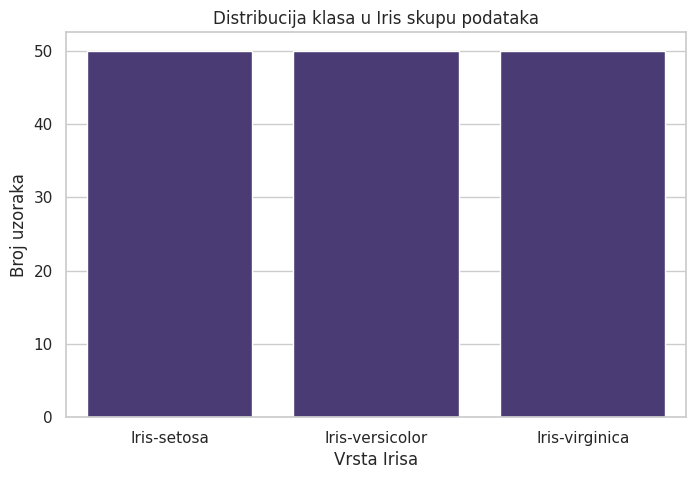

   Komentar: Klase su savršeno balansirane (50 uzoraka po klasi). Točnost je pouzdana metrika.


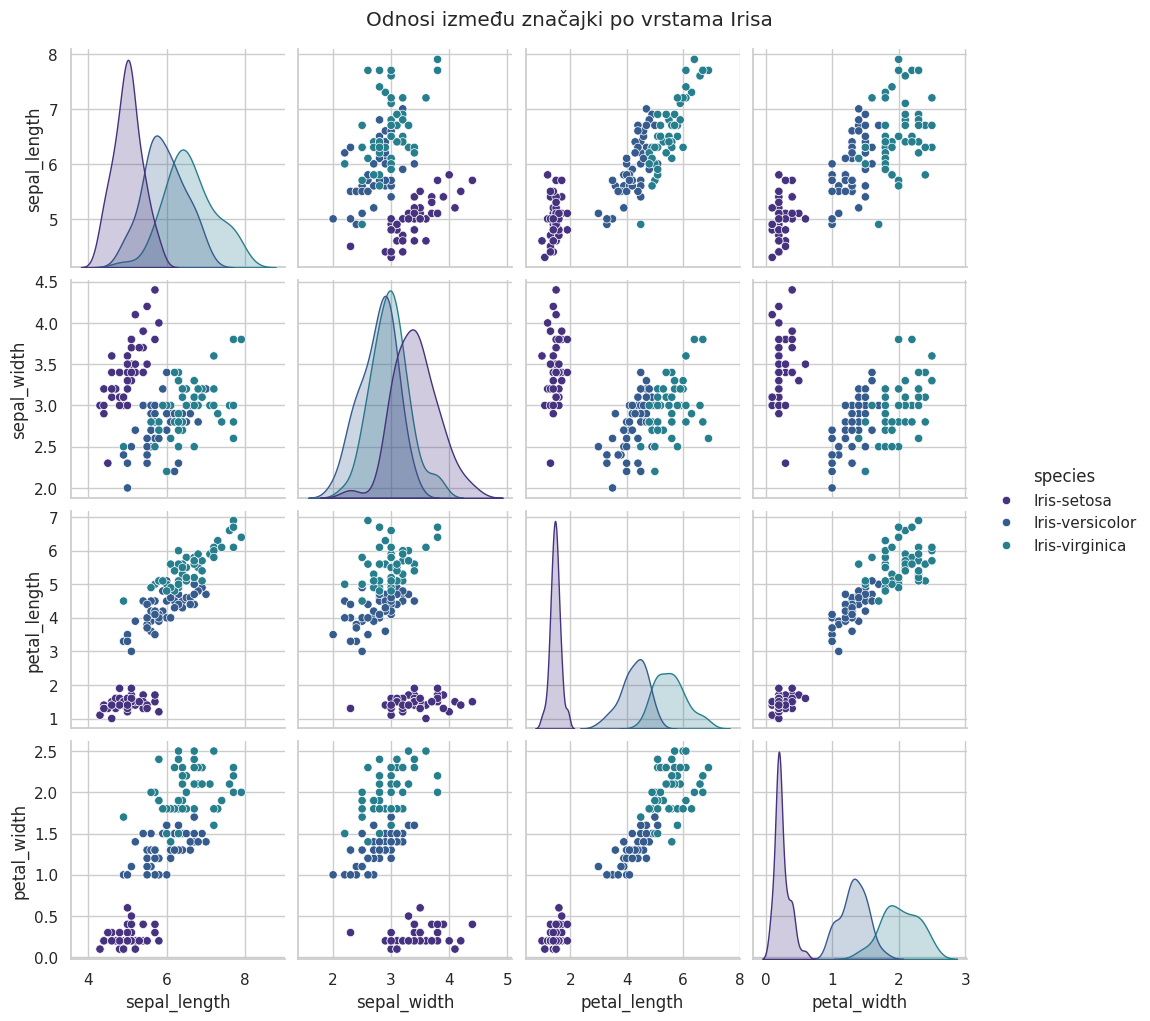

   Komentar: Vrsta 'setosa' je jasno linearno odvojiva od ostale dvije.


In [51]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA I VIZUALIZACIJA
# ==============================================================================
print("\n2. Deskriptivna analiza:")
# Prikaz distribucije klasa
plt.figure(figsize=(8, 5))
sns.countplot(x=y_iris_raw)
plt.title('Distribucija klasa u Iris skupu podataka')
plt.ylabel('Broj uzoraka')
plt.xlabel('Vrsta Irisa')
plt.show()
print("   Komentar: Klase su savršeno balansirane (50 uzoraka po klasi). Točnost je pouzdana metrika.")

# Pairplot za vizualizaciju odnosa
sns.pairplot(df_iris, hue='species', height=2.5)
plt.suptitle('Odnosi između značajki po vrstama Irisa', y=1.02)
plt.show()
print("   Komentar: Vrsta 'setosa' je jasno linearno odvojiva od ostale dvije.")


Modeliranje i evaluacija

In [56]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Jednostavna Train/Test podjela)
# ==============================================================================
print("\n3. Modeliranje (jednostavna train/test podjela):")
# Definicija modela
classifiers = {
    "ID3/C4.5 (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "CART (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
}

results_simple = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train_iris, y_train_iris)
    y_pred = clf.predict(X_test_iris)
    end_time = time.time()

    accuracy = accuracy_score(y_test_iris, y_pred)
    f1 = f1_score(y_test_iris, y_pred, average='weighted')
    results_simple[name] = {'Točnost': accuracy, 'F1-Score': f1, 'Vrijeme (s)': end_time - start_time}
    print(f"   - {name}: F1-Score = {f1:.4f}")

df_results_simple = pd.DataFrame.from_dict(results_simple, orient='index')




3. Modeliranje (jednostavna train/test podjela):
   - ID3/C4.5 (Entropy): F1-Score = 0.8888
   - CART (Gini): F1-Score = 0.9327
   - Random Forest: F1-Score = 0.8878
   - XGBoost: F1-Score = 0.9333


Modeliranje i evaluacija unakrsna validacija (CV)

In [57]:
# ==============================================================================
# 4. MODELIRANJE I EVALUACIJA (Unakrsna Validacija - Cross-Validation)
# ==============================================================================
print("\n4. Modeliranje (Unakrsna Validacija, k=10):")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_metrics = {'accuracy': 'accuracy', 'f1_weighted': 'f1_weighted'}

results_cv = {}
for name, clf in classifiers.items():
    start_time = time.time()
    # Pipeline za skaliranje unutar svakog fold-a
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])
    cv_scores = cross_validate(pipeline, X_iris, y_iris, cv=kf, scoring=scoring_metrics)
    end_time = time.time()

    results_cv[name] = {
        'Točnost (CV)': cv_scores['test_accuracy'].mean(),
        'F1-Score (CV)': cv_scores['test_f1_weighted'].mean(),
        'Vrijeme (s)': end_time - start_time
    }
    print(f"   - {name}: Prosječni F1-Score (CV) = {cv_scores['test_f1_weighted'].mean():.4f}")

df_results_cv = pd.DataFrame.from_dict(results_cv, orient='index')


4. Modeliranje (Unakrsna Validacija, k=10):
   - ID3/C4.5 (Entropy): Prosječni F1-Score (CV) = 0.9402
   - CART (Gini): Prosječni F1-Score (CV) = 0.9402
   - Random Forest: Prosječni F1-Score (CV) = 0.9602
   - XGBoost: Prosječni F1-Score (CV) = 0.9390


Usporedba performansi


5. Usporedba performansi:

Tablica rezultata (jednostavna train/test podjela):


,Točnost,F1-Score,Vrijeme (s)
XGBoost,0.933,0.933,0.042
CART (Gini),0.933,0.933,0.005
ID3/C4.5 (Entropy),0.889,0.889,0.005
Random Forest,0.889,0.888,0.186



Tablica rezultata (10-struka unakrsna validacija):


,Točnost (CV),F1-Score (CV),Vrijeme (s)
Random Forest,0.960,0.960,1.662
ID3/C4.5 (Entropy),0.940,0.940,0.115
CART (Gini),0.940,0.940,0.092
XGBoost,0.940,0.939,0.484


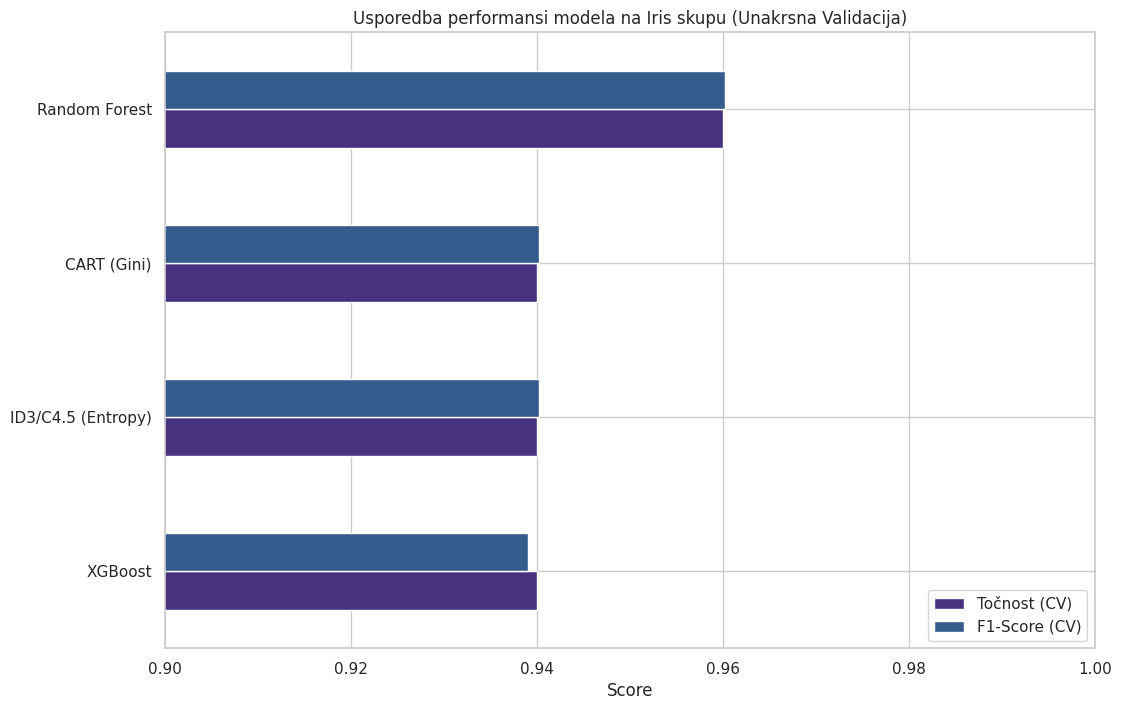


--- ANALIZA ZAVRŠENA: IRIS SKUP PODATAKA ---


In [54]:
# ==============================================================================
# 5. USPOREDBA PERFORMANSI I ZAKLJUČAK
# ==============================================================================
print("\n5. Usporedba performansi:")

print("\nTablica rezultata (jednostavna train/test podjela):")
display(df_results_simple.sort_values(by='F1-Score', ascending=False))

print("\nTablica rezultata (10-struka unakrsna validacija):")
display(df_results_cv.sort_values(by='F1-Score (CV)', ascending=False))

# Vizualizacija rezultata
df_results_cv.sort_values(by='F1-Score (CV)', ascending=True, inplace=True)
df_results_cv[['Točnost (CV)', 'F1-Score (CV)']].plot(kind='barh', figsize=(12, 8))
plt.title('Usporedba performansi modela na Iris skupu (Unakrsna Validacija)')
plt.xlabel('Score')
plt.xlim(0.9, 1.0) # Fokus na vrh performansi
plt.legend(loc='lower right')
plt.show()

print("\n--- ANALIZA ZAVRŠENA: IRIS SKUP PODATAKA ---")

Vizualizacija algoritma stabla odlučivanja na skupu Iris

--- VIZUALIZACIJA JEDNOG STABLA ODLUČIVANJA ---
Stablo za vizualizaciju je istrenirano.


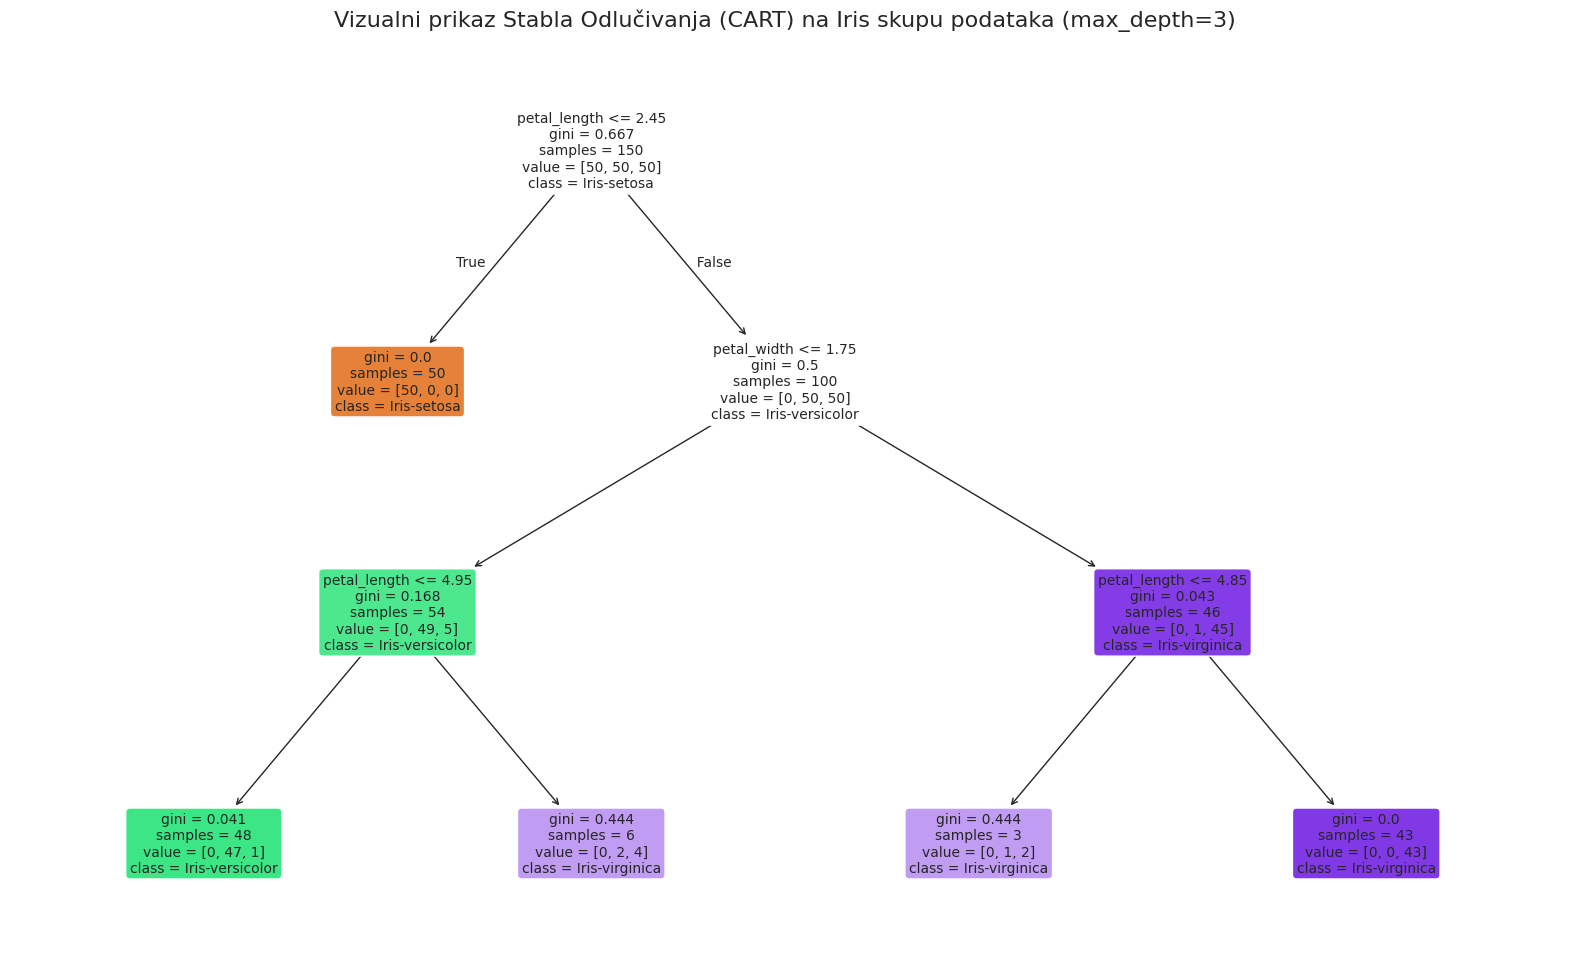


**Kako čitati stablo:**
- **Pravilo u čvoru:** Prvi red u svakom čvoru je pravilo za podjelu (npr. 'petal width (cm) <= 0.8').
- **Gini:** Gini nečistoća u tom čvoru. Što je niža, to je čvor 'čišći' (sadrži više uzoraka jedne klase).
- **Samples:** Broj uzoraka koji su došli do tog čvora.
- **Value:** Raspodjela uzoraka po klasama u tom čvoru (npr. [50, 50, 50]).
- **Class:** Većinska klasa u tom čvoru, koja bi bila predikcija da se stablo tu zaustavi.



In [55]:
# Pretpostavka: Sljedeći objekti već postoje u memoriji iz analize Iris skupa:
# - X_iris: DataFrame značajki
# - y_iris: Kodirana ciljna varijabla
# - le_iris: Istrenirani LabelEncoder

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print("--- VIZUALIZACIJA JEDNOG STABLA ODLUČIVANJA ---")

# 1. KORAK: Treniranje jednog CART modela na svim podacima
# Koristimo malu maksimalnu dubinu (max_depth=3) kako bi stablo bilo čitljivo
viz_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
viz_tree.fit(X_iris, y_iris)
print("Stablo za vizualizaciju je istrenirano.")

# 2. KORAK: Crtanje stabla
plt.figure(figsize=(20, 12)) # Povećavamo veličinu slike za bolju čitljivost
plot_tree(viz_tree,
          filled=True, # Obojaj čvorove prema većinskoj klasi
          feature_names=X_iris.columns.tolist(), # Imena značajki
          class_names=le_iris.classes_.tolist(), # Imena klasa
          rounded=True, # Zaobljeni rubovi okvira
          fontsize=10) # Veličina fonta

plt.title("Vizualni prikaz Stabla Odlučivanja (CART) na Iris skupu podataka (max_depth=3)", fontsize=16)
plt.show()

print("""
**Kako čitati stablo:**
- **Pravilo u čvoru:** Prvi red u svakom čvoru je pravilo za podjelu (npr. 'petal width (cm) <= 0.8').
- **Gini:** Gini nečistoća u tom čvoru. Što je niža, to je čvor 'čišći' (sadrži više uzoraka jedne klase).
- **Samples:** Broj uzoraka koji su došli do tog čvora.
- **Value:** Raspodjela uzoraka po klasama u tom čvoru (npr. [50, 50, 50]).
- **Class:** Većinska klasa u tom čvoru, koja bi bila predikcija da se stablo tu zaustavi.
""")


# <a id="bank"></a>2. Analiza skupa podataka: Bank Marketing

## 2.1 Klasifikacija

In [ ]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
# Uklanjanje stupca 'duration' radi izbjegavanja curenja podataka
df_bank_prep = df_bank.drop('duration', axis=1)

# Odvajanje značajki i ciljne varijable
X_bank = df_bank_prep.drop('y', axis=1)
y_bank_raw = df_bank_prep['y']

# Kodiranje ciljne varijable
le_bank = LabelEncoder()
y_bank = le_bank.fit_transform(y_bank_raw)

# Identifikacija numeričkih i kategorijskih stupaca
numeric_features = X_bank.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_bank.select_dtypes(include=['object']).columns.tolist()

# Izrada cjevovoda (pipeline) za predobradu
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Stvaranje predprocesora koji primjenjuje transformacije na odgovarajuće stupce
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Podjela na train/test prije primjene transformacija
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(
    X_bank, y_bank, test_size=0.3, random_state=42, stratify=y_bank
)
print("\n1. Podaci su pripremljeni i podijeljeni.")


1. Podaci su pripremljeni i podijeljeni.


Deskriptivna statistika



2. Deskriptivna analiza:


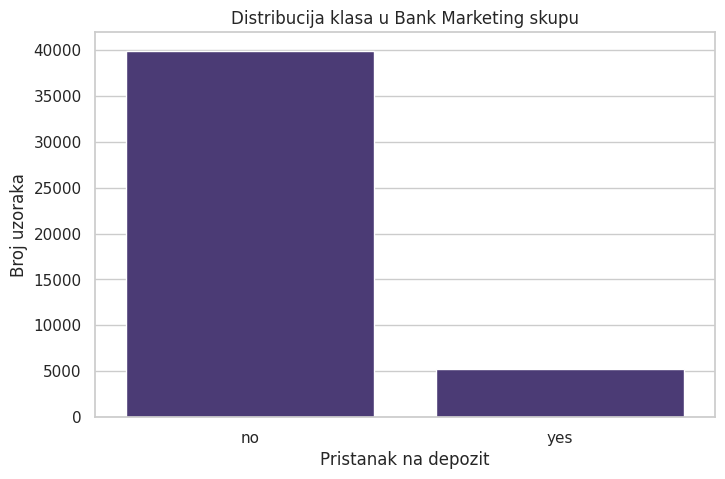

   Komentar: Klase su jako neuravnotežene! 'Accuracy' je nepouzdana metrika.
y
no    0.883
yes   0.117
Name: proportion, dtype: float64


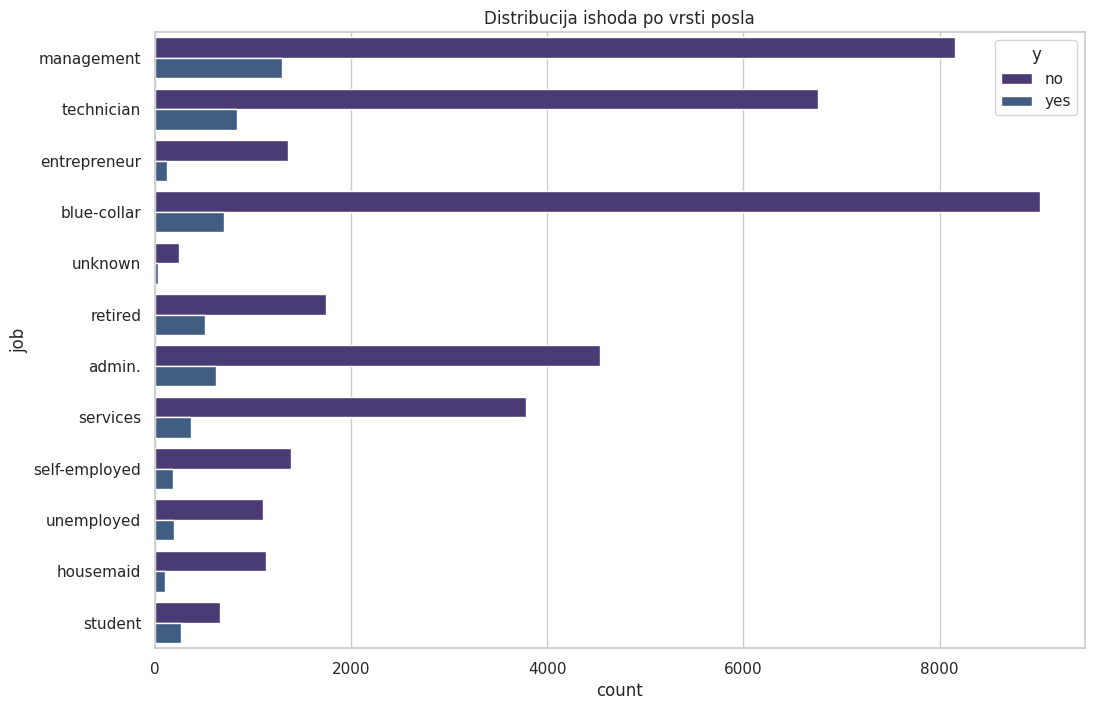

In [ ]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA I VIZUALIZACIJA
# ==============================================================================
print("\n2. Deskriptivna analiza:")
plt.figure(figsize=(8, 5))
sns.countplot(x=y_bank_raw)
plt.title('Distribucija klasa u Bank Marketing skupu')
plt.ylabel('Broj uzoraka')
plt.xlabel('Pristanak na depozit')
plt.show()
print("   Komentar: Klase su jako neuravnotežene! 'Accuracy' je nepouzdana metrika.")
print(df_bank['y'].value_counts(normalize=True))

# Vizualizacija odnosa posla i ishoda
plt.figure(figsize=(12, 8))
sns.countplot(y='job', hue='y', data=df_bank)
plt.title('Distribucija ishoda po vrsti posla')
plt.show()


Modeliranje i evaluacija

In [58]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Unakrsna Validacija - Cross-Validation)
# ==============================================================================
print("\n3. Modeliranje (Unakrsna Validacija, k=5):")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Fokusiramo se na metrike prikladne za neuravnotežene skupove
scoring_metrics = {'f1_weighted': 'f1_weighted', 'roc_auc': 'roc_auc'}

classifiers = {
    "ID3/C4.5 (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "CART (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=sum(y_bank==0)/sum(y_bank==1)) # Važno za neuravnoteženost
}

results_cv_bank = {}
feature_importances = {}
for name, clf in classifiers.items():
    # Stvaramo kompletan cjevovod koji uključuje predobradu i klasifikator
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', clf)])

    print(f"   Treniram model: {name}...")
    start_time = time.time()
    cv_scores = cross_validate(model_pipeline, X_bank, y_bank, cv=kf, scoring=scoring_metrics)
    end_time = time.time()

    results_cv_bank[name] = {
        'F1-Score (CV)': cv_scores['test_f1_weighted'].mean(),
        'ROC AUC (CV)': cv_scores['test_roc_auc'].mean(),
        'Vrijeme (s)': end_time - start_time
    }

    # Spremanje važnosti značajki za ensemble modele
    if hasattr(clf, 'feature_importances_'):
        # Moramo prvo trenirati model na cijelom setu da dobijemo važnost
        model_pipeline.fit(X_bank, y_bank)
        # Dobivanje imena značajki nakon OneHotEncodinga
        ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
        all_feature_names = numeric_features + ohe_feature_names.tolist()
        importances = model_pipeline.named_steps['classifier'].feature_importances_
        feature_importances[name] = pd.Series(importances, index=all_feature_names)

df_results_cv_bank = pd.DataFrame.from_dict(results_cv_bank, orient='index')



3. Modeliranje (Unakrsna Validacija, k=5):
   Treniram model: ID3/C4.5 (Entropy)...
   Treniram model: CART (Gini)...
   Treniram model: Random Forest...
   Treniram model: XGBoost...


Usporedba performansi


4. Usporedba performansi:

Tablica rezultata (5-struka unakrsna validacija):


,F1-Score (CV),ROC AUC (CV),Vrijeme (s)
Random Forest,0.870,0.781,31.388
XGBoost,0.843,0.776,6.671
ID3/C4.5 (Entropy),0.840,0.620,4.327
CART (Gini),0.834,0.614,4.078


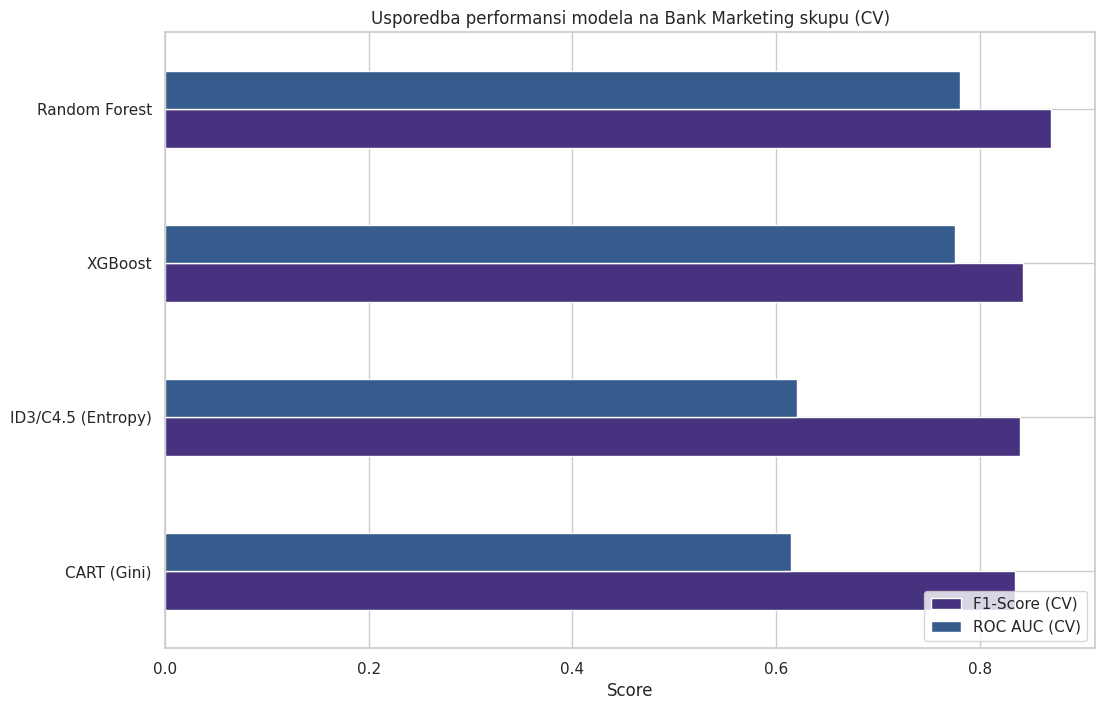


--- ANALIZA ZAVRŠENA: BANK MARKETING SKUP PODATAKA ---


In [ ]:
# ==============================================================================
# 4. USPOREDBA PERFORMANSI I ZAKLJUČAK
# ==============================================================================
print("\n4. Usporedba performansi:")
print("\nTablica rezultata (5-struka unakrsna validacija):")
display(df_results_cv_bank.sort_values(by='ROC AUC (CV)', ascending=False))

# Vizualizacija rezultata
df_results_cv_bank.sort_values(by='ROC AUC (CV)', ascending=True, inplace=True)
df_results_cv_bank[['F1-Score (CV)', 'ROC AUC (CV)']].plot(kind='barh', figsize=(12, 8))
plt.title('Usporedba performansi modela na Bank Marketing skupu (CV)')
plt.xlabel('Score')
plt.legend(loc='lower right')
plt.show()

# Prikaz važnosti značajki za najbolji model
if feature_importances:
    best_model_name = df_results_cv_bank.index[-1] # Posljednji nakon sortiranja
    if best_model_name in feature_importances:
        plt.figure(figsize=(12, 10))
        feature_importances[best_model_name].nlargest(20).plot(kind='barh')
        plt.title(f'Top 20 najvažnijih značajki za model: {best_model_name}')
        plt.xlabel('Važnost')
        plt.show()

print("\n--- ANALIZA ZAVRŠENA: BANK MARKETING SKUP PODATAKA ---")


## 2.2 Regresijska analiza

In [ ]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
# Ovdje je ciljna varijabla 'age', a ostale su značajke.
# Uklanjamo 'duration' iz istih razloga kao i prije.
X_bank_reg = df_bank.drop(['age', 'duration'], axis=1)
y_bank_reg = df_bank['age']

# Identifikacija numeričkih i kategorijskih stupaca
numeric_features_reg = X_bank_reg.select_dtypes(include=np.number).columns.tolist()
categorical_features_reg = X_bank_reg.select_dtypes(include=['object']).columns.tolist()

# Izrada cjevovoda (pipeline) za predobradu
numeric_transformer_reg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer_reg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))])

# Stvaranje predprocesora
preprocessor_bank_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reg, numeric_features_reg),
        ('cat', categorical_transformer_reg, categorical_features_reg)])

print("\n1. Cjevovod za pripremu podataka je kreiran.")




1. Cjevovod za pripremu podataka je kreiran.


Deskriptivna statistika


2. Deskriptivna analiza ciljne varijable (age):


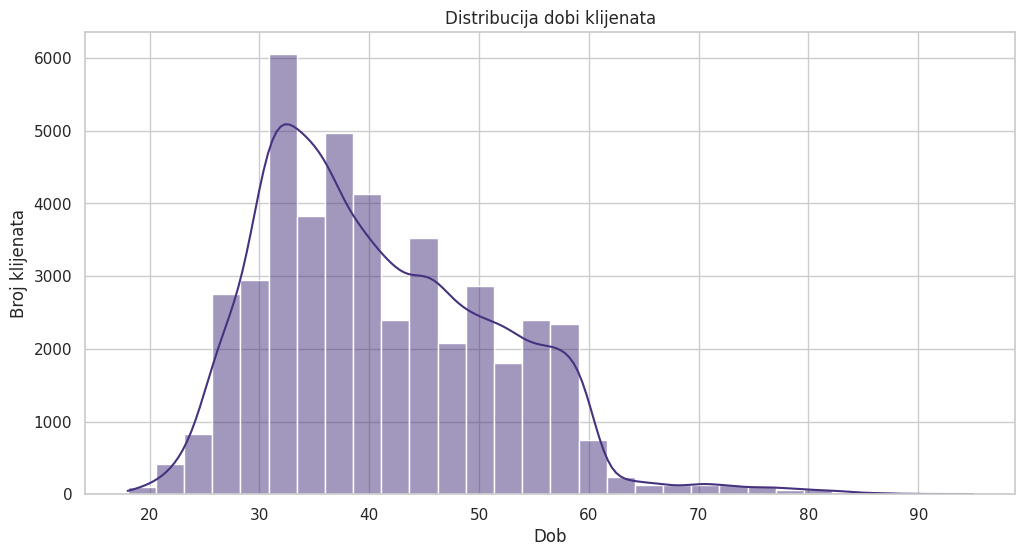

   Komentar: Distribucija dobi je blago iskošena udesno, s najvećom koncentracijom klijenata u dobi između 30 i 40 godina.


In [ ]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA CILJNE VARIJABLE
# ==============================================================================
print("\n2. Deskriptivna analiza ciljne varijable (age):")
plt.figure(figsize=(12, 6))
sns.histplot(y_bank_reg, kde=True, bins=30)
plt.title('Distribucija dobi klijenata')
plt.xlabel('Dob')
plt.ylabel('Broj klijenata')
plt.show()
print("   Komentar: Distribucija dobi je blago iskošena udesno, s najvećom koncentracijom klijenata u dobi između 30 i 40 godina.")


Modeliranje i evaluacija

In [ ]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Unakrsna Validacija)
# ==============================================================================
print("\n3. Modeliranje (Unakrsna Validacija, k=10):")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_reg = {'neg_root_mean_squared_error': 'neg_root_mean_squared_error', 'r2': 'r2'}

regressors = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=4),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=4)
}

results_cv_bank_reg = {}
for name, reg in regressors.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_bank_reg),
                                     ('regressor', reg)])
    print(f"   Treniram model: {name}...")
    start_time = time.time()
    cv_scores = cross_validate(model_pipeline, X_bank_reg, y_bank_reg, cv=kf, scoring=scoring_reg, n_jobs=-1)
    end_time = time.time()

    results_cv_bank_reg[name] = {
        'RMSE (CV)': -cv_scores['test_neg_root_mean_squared_error'].mean(),
        'R2 Score (CV)': cv_scores['test_r2'].mean(),
        'Vrijeme (s)': end_time - start_time
    }

df_results_cv_bank_reg = pd.DataFrame.from_dict(results_cv_bank_reg, orient='index')



3. Modeliranje (Unakrsna Validacija, k=10):
   Treniram model: Decision Tree Regressor...
   Treniram model: Random Forest Regressor...
   Treniram model: XGBoost Regressor...


Usporedba performansi


4. Usporedba performansi:

Tablica rezultata (10-struka unakrsna validacija):


,RMSE (CV),R2 Score (CV),Vrijeme (s)
XGBoost Regressor,7.765,0.465,6.799
Random Forest Regressor,7.992,0.433,4436.997
Decision Tree Regressor,10.977,-0.070,72.138


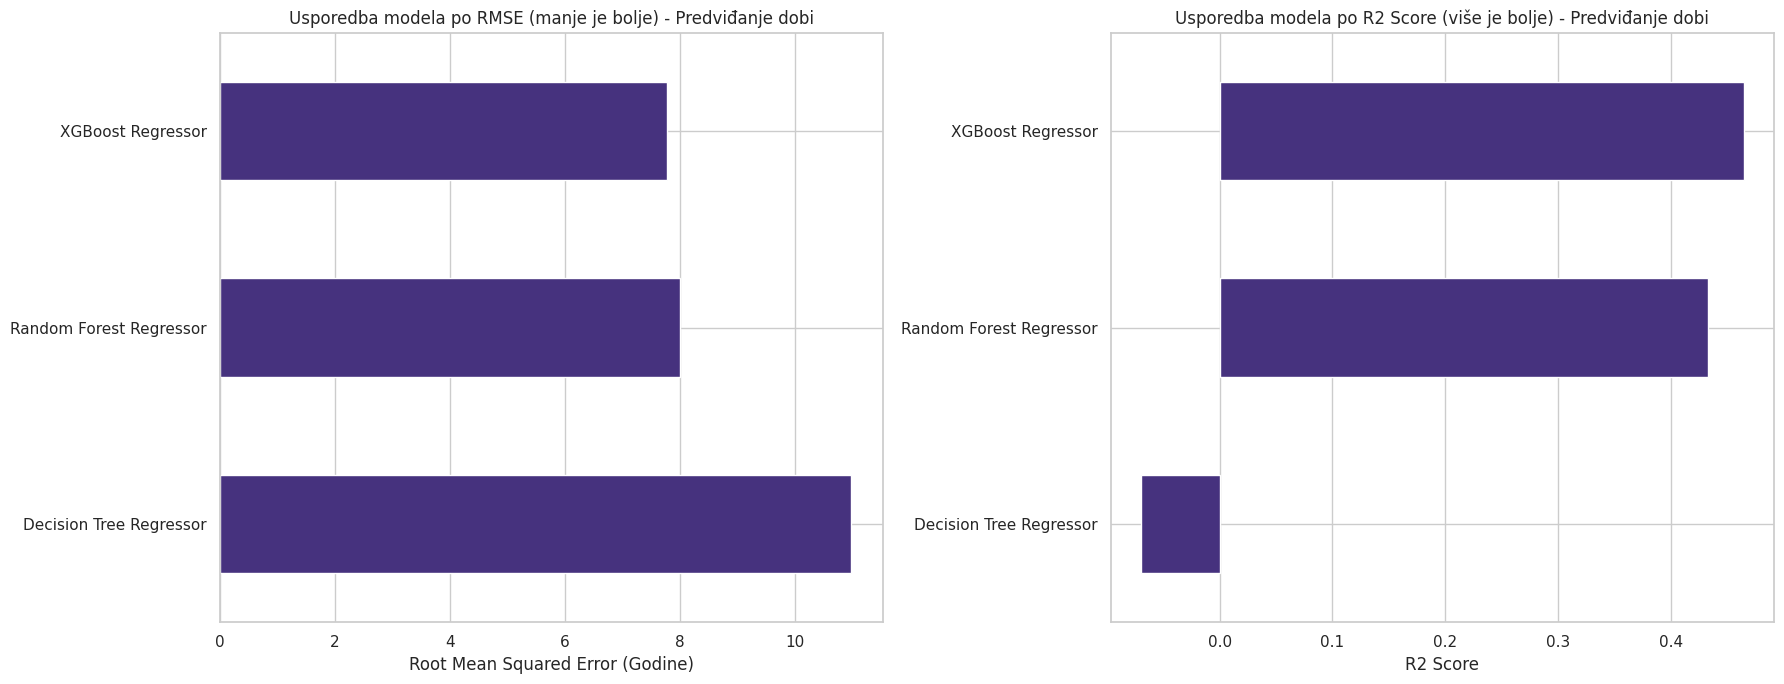


--- ANALIZA ZAVRŠENA: BANK MARKETING (REGRESIJA) ---


In [42]:
# ==============================================================================
# 4. USPOREDBA PERFORMANSI
# ==============================================================================
print("\n4. Usporedba performansi:")
print("\nTablica rezultata (10-struka unakrsna validacija):")
display(df_results_cv_bank_reg.sort_values(by='RMSE (CV)', ascending=True))

# Vizualizacija
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
df_results_cv_bank_reg.sort_values(by='RMSE (CV)', ascending=False, inplace=True)
df_results_cv_bank_reg['RMSE (CV)'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Usporedba modela po RMSE (manje je bolje) - Predviđanje dobi')
axes[0].set_xlabel('Root Mean Squared Error (Godine)')

df_results_cv_bank_reg.sort_values(by='R2 Score (CV)', ascending=True, inplace=True)
df_results_cv_bank_reg['R2 Score (CV)'].plot(kind='barh', ax=axes[1])
axes[1].set_title('Usporedba modela po R2 Score (više je bolje) - Predviđanje dobi')
axes[1].set_xlabel('R2 Score')

plt.tight_layout()
plt.show()

print("\n--- ANALIZA ZAVRŠENA: BANK MARKETING (REGRESIJA) ---")


## XAI Objašnjivost XGBoost modela (SHAP)

--- ZAPOČINJEM XAI ANALIZU POMOĆU SHAP-a ---

1. Treniram finalni XGBoost model na svim podacima...
   Model je uspješno istreniran.

2. Kreiram SHAP explainer i računam SHAP vrijednosti...
   SHAP vrijednosti su izračunate.

3. Generiram vizualizacije za interpretaciju:

   a) Globalna važnost značajki (Summary Plot):


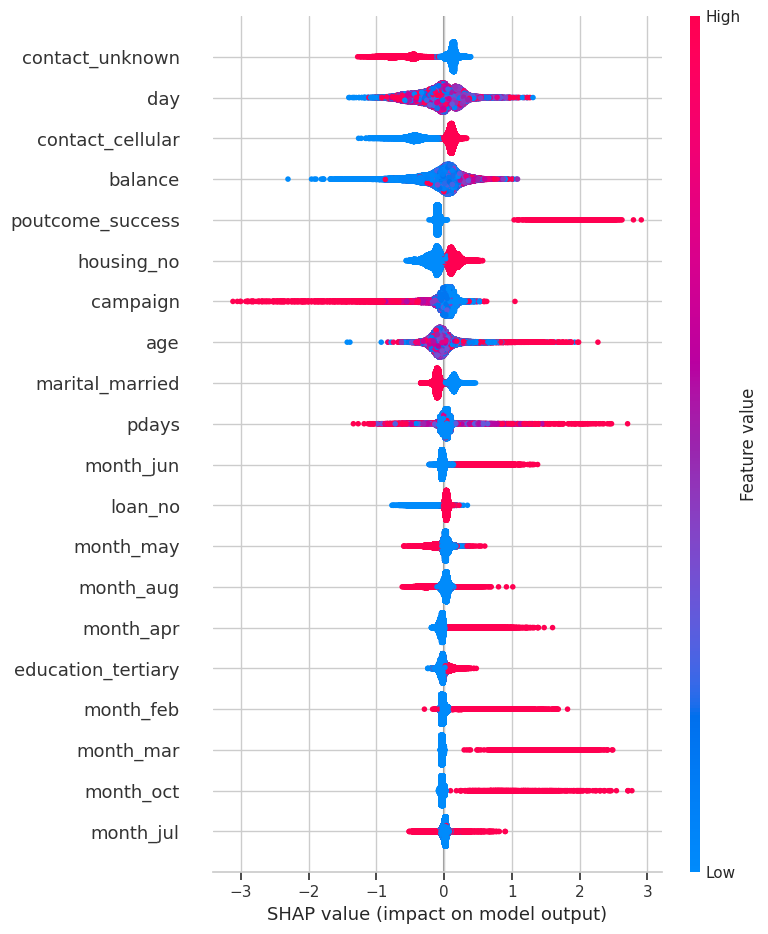


   **Kako interpretirati Summary Plot:**
   - **Poredak značajki:** Značajke na vrhu imaju najveći utjecaj na predikcije modela.
   - **Boja točke:** Crvena boja označava visoku vrijednost te značajke, dok plava označava nisku.
   - **Položaj na X-osi:** Točke desno od nule predstavljaju utjecaj koji gura predikciju prema klasi '1' (npr. 'yes'). Točke lijevo guraju predikciju prema klasi '0' (npr. 'no').
   - **Primjer:** Ako za značajku 'job_management' vidite puno crvenih točaka na desnoj strani, to znači da visoka vrijednost te značajke (tj. ako klijent JEST menadžer) snažno povećava vjerojatnost da će ishod biti 'yes'.


   b) Lokalna interpretacija za prvog klijenta u skupu (Force Plot):



   **Kako interpretirati Force Plot:**
   - **Osnovna vrijednost (base value):** Prosječna predikcija modela na cijelom skupu podataka.
   - **Crvene strelice:** Značajke koje guraju predikciju prema VIŠOJ vrijednosti (prema 'yes'). Duljina strelice označava snagu utjecaja.
   - **Plave strelice:** Značajke koje guraju predikciju prema NIŽOJ vrijednosti (prema 'no').
   - **Konačna predikcija (f(x)):** Boldirana vrijednost na kraju je konačna predikcija modela za ovog specifičnog klijenta. Ako je viša od osnovne vrijednosti, vjerojatnije je da će biti klasificiran kao 'yes'.


--- XAI ANALIZA JE GOTOVA ---


In [59]:
# Pretpostavka: Sljedeći objekti već postoje u memoriji iz prethodne analize:
# - preprocessor: Cjevovod za predobradu Bank Marketing skupa
# - X_bank: Cijeli skup značajki (prije predobrade)
# - y_bank: Cijeli skup kodiranih ciljnih varijabli

print("--- ZAPOČINJEM XAI ANALIZU POMOĆU SHAP-a ---")

# Potrebno je instalirati SHAP biblioteku ako već nije instalirana
try:
    import shap
except ImportError:
    print("Instaliram SHAP biblioteku...")
    !pip install shap
    import shap

# 1. KORAK: Treniranje finalnog modela na svim podacima
# Da bismo objasnili model, moramo imati jedan, finalni model.
# Treniramo ga na cijelom skupu podataka.
print("\n1. Treniram finalni XGBoost model na svim podacima...")
final_xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Kreiramo kompletan cjevovod
# Važno: koristimo 'preprocessor' koji je kreiran u analizi Bank Marketing skupa
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', final_xgb_model)])

final_pipeline.fit(X_bank, y_bank)
print("   Model je uspješno istreniran.")

# 2. KORAK: Priprema podataka za SHAP
# SHAP radi najbolje s numeričkim podacima, stoga moramo transformirati naš X set.
X_bank_transformed = final_pipeline.named_steps['preprocessor'].transform(X_bank)

# ==============================================================================
#                               ISPRAVAK KODA
# ==============================================================================
# Ponovno definiramo imena stupaca unutar ove ćelije kako bismo osigurali
# ispravnost i neovisnost o prethodno pokrenutim ćelijama koje su mogle
# pregaziti ove varijable.
numeric_features = X_bank.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_bank.select_dtypes(include=['object']).columns.tolist()
# ==============================================================================

# Dobivanje imena značajki nakon OneHotEncoding-a za ljepši prikaz
ohe_feature_names = final_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + ohe_feature_names.tolist()

# Pretvaranje transformiranih podataka natrag u DataFrame s ispravnim imenima
X_bank_transformed_df = pd.DataFrame(X_bank_transformed, columns=all_feature_names)


# 3. KORAK: Kreiranje SHAP objašnjenja
print("\n2. Kreiram SHAP explainer i računam SHAP vrijednosti...")
# Koristimo TreeExplainer koji je optimiziran za stabla odlučivanja
explainer = shap.TreeExplainer(final_pipeline.named_steps['classifier'])
shap_values = explainer.shap_values(X_bank_transformed_df)
print("   SHAP vrijednosti su izračunate.")


# 4. KORAK: Vizualizacija i interpretacija
print("\n3. Generiram vizualizacije za interpretaciju:")

# --- Globalna interpretacija: Summary Plot (Beeswarm) ---
print("\n   a) Globalna važnost značajki (Summary Plot):")
shap.summary_plot(shap_values, X_bank_transformed_df, plot_type="dot")

print("""
   **Kako interpretirati Summary Plot:**
   - **Poredak značajki:** Značajke na vrhu imaju najveći utjecaj na predikcije modela.
   - **Boja točke:** Crvena boja označava visoku vrijednost te značajke, dok plava označava nisku.
   - **Položaj na X-osi:** Točke desno od nule predstavljaju utjecaj koji gura predikciju prema klasi '1' (npr. 'yes'). Točke lijevo guraju predikciju prema klasi '0' (npr. 'no').
   - **Primjer:** Ako za značajku 'job_management' vidite puno crvenih točaka na desnoj strani, to znači da visoka vrijednost te značajke (tj. ako klijent JEST menadžer) snažno povećava vjerojatnost da će ishod biti 'yes'.
""")

# --- Lokalna interpretacija: Force Plot za jednog klijenta ---
print("\n   b) Lokalna interpretacija za prvog klijenta u skupu (Force Plot):")
# Inicijalizacija Javascripta za bolji prikaz
shap.initjs()

# Prikaz objašnjenja za prvu instancu
display(shap.force_plot(explainer.expected_value, shap_values[0,:], X_bank_transformed_df.iloc[0,:]))

print("""
   **Kako interpretirati Force Plot:**
   - **Osnovna vrijednost (base value):** Prosječna predikcija modela na cijelom skupu podataka.
   - **Crvene strelice:** Značajke koje guraju predikciju prema VIŠOJ vrijednosti (prema 'yes'). Duljina strelice označava snagu utjecaja.
   - **Plave strelice:** Značajke koje guraju predikciju prema NIŽOJ vrijednosti (prema 'no').
   - **Konačna predikcija (f(x)):** Boldirana vrijednost na kraju je konačna predikcija modela za ovog specifičnog klijenta. Ako je viša od osnovne vrijednosti, vjerojatnije je da će biti klasificiran kao 'yes'.
""")


print("\n--- XAI ANALIZA JE GOTOVA ---")


# <a id="adult"></a>3. Analiza skupa podataka: Adult

## 3.1 Klasifikacija

In [ ]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
# Uklanjanje stupca 'fnlwgt' jer je specifičan za popis i nije općenito koristan
df_adult_prep = df_adult.drop('fnlwgt', axis=1)

# Odvajanje značajki i ciljne varijable
X_adult = df_adult_prep.drop('income', axis=1)
y_adult_raw = df_adult_prep['income']

# Kodiranje ciljne varijable
le_adult = LabelEncoder()
y_adult = le_adult.fit_transform(y_adult_raw)

# Identifikacija numeričkih i kategorijskih stupaca
numeric_features = X_adult.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_adult.select_dtypes(include=['object']).columns.tolist()

# Izrada cjevovoda (pipeline) za predobradu
# Numerički stupci: zamijeni nedostajuće vrijednosti s medijanom i skaliraj
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Kategorijski stupci: zamijeni nedostajuće vrijednosti najčešćom i primijeni OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))])

# Stvaranje predprocesora
preprocessor_adult = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

print("\n1. Cjevovod za pripremu podataka je kreiran.")




1. Cjevovod za pripremu podataka je kreiran.


Deskriptivna statistika


2. Deskriptivna analiza:


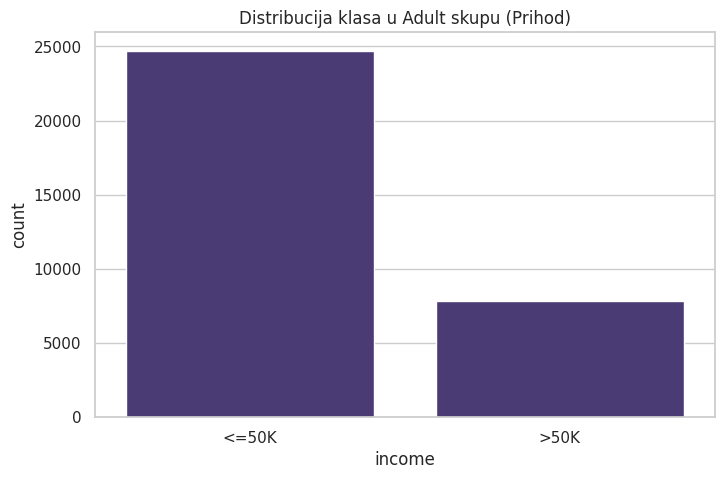

   Komentar: Klase su neuravnotežene. Fokus na F1 i ROC AUC metrike.
income
<=50K   0.759
>50K    0.241
Name: proportion, dtype: float64

Broj nedostajućih vrijednosti po stupcima:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [ ]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA I VIZUALIZACIJA
# ==============================================================================
print("\n2. Deskriptivna analiza:")
plt.figure(figsize=(8, 5))
sns.countplot(x=y_adult_raw)
plt.title('Distribucija klasa u Adult skupu (Prihod)')
plt.show()
print("   Komentar: Klase su neuravnotežene. Fokus na F1 i ROC AUC metrike.")
print(df_adult['income'].value_counts(normalize=True))

# Provjera nedostajućih vrijednosti
print("\nBroj nedostajućih vrijednosti po stupcima:")
print(df_adult.isnull().sum())


Modeliranje i evaluacija

In [ ]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Unakrsna Validacija)
# ==============================================================================
print("\n3. Modeliranje (Unakrsna Validacija, k=5):")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring_metrics = {'f1_weighted': 'f1_weighted', 'roc_auc': 'roc_auc'}

classifiers = {
    "ID3/C4.5 (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "CART (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)
}

results_cv_adult = {}
for name, clf in classifiers.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_adult),
                                     ('classifier', clf)])
    print(f"   Treniram model: {name}...")
    start_time = time.time()
    cv_scores = cross_validate(model_pipeline, X_adult, y_adult, cv=kf, scoring=scoring_metrics, n_jobs=-1)
    end_time = time.time()

    results_cv_adult[name] = {
        'F1-Score (CV)': cv_scores['test_f1_weighted'].mean(),
        'ROC AUC (CV)': cv_scores['test_roc_auc'].mean(),
        'Vrijeme (s)': end_time - start_time
    }

df_results_cv_adult = pd.DataFrame.from_dict(results_cv_adult, orient='index')




3. Modeliranje (Unakrsna Validacija, k=5):
   Treniram model: ID3/C4.5 (Entropy)...
   Treniram model: CART (Gini)...
   Treniram model: Random Forest...
   Treniram model: XGBoost...


Usporedba performansi


4. Usporedba performansi:

Tablica rezultata (5-struka unakrsna validacija):


,F1-Score (CV),ROC AUC (CV),Vrijeme (s)
XGBoost,0.868,0.928,2.750
Random Forest,0.843,0.892,103.895
ID3/C4.5 (Entropy),0.820,0.769,6.938
CART (Gini),0.818,0.769,6.954


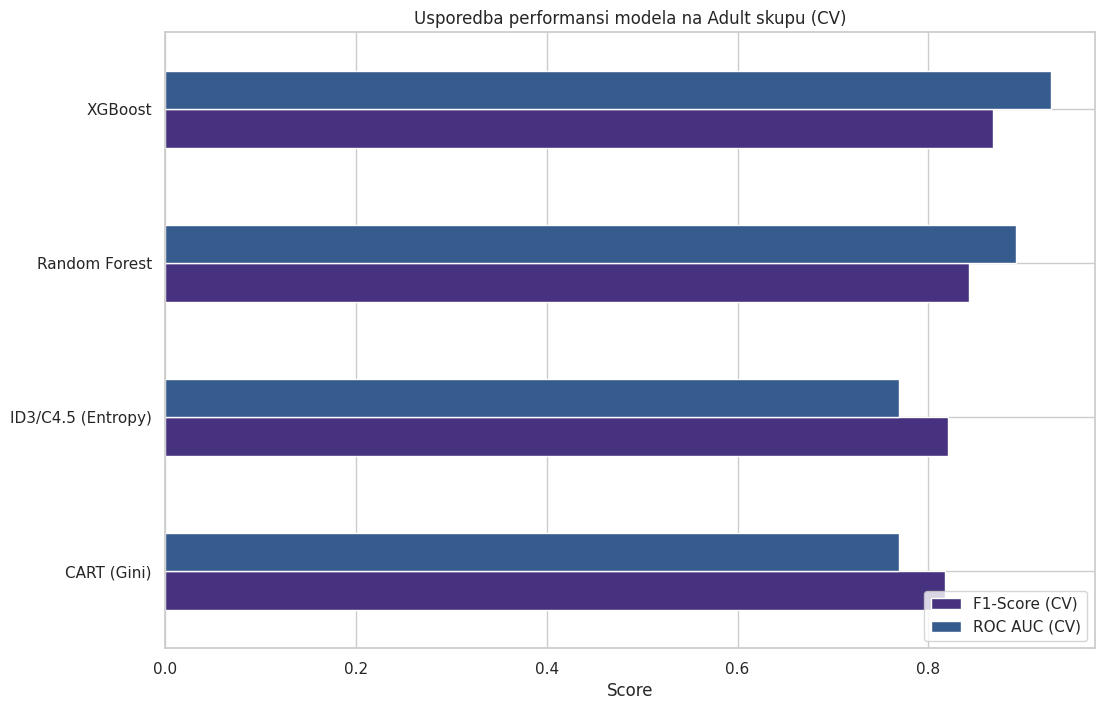


--- ANALIZA ZAVRŠENA: ADULT SKUP PODATAKA ---


In [ ]:
# ==============================================================================
# 4. USPOREDBA PERFORMANSI
# ==============================================================================
print("\n4. Usporedba performansi:")
print("\nTablica rezultata (5-struka unakrsna validacija):")
display(df_results_cv_adult.sort_values(by='ROC AUC (CV)', ascending=False))

# Vizualizacija
df_results_cv_adult.sort_values(by='ROC AUC (CV)', ascending=True, inplace=True)
df_results_cv_adult[['F1-Score (CV)', 'ROC AUC (CV)']].plot(kind='barh', figsize=(12, 8))
plt.title('Usporedba performansi modela na Adult skupu (CV)')
plt.xlabel('Score')
plt.legend(loc='lower right')
plt.show()

print("\n--- ANALIZA ZAVRŠENA: ADULT SKUP PODATAKA ---")


## 3.2 Regresija

In [ ]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
# Ciljna varijabla je 'hours-per-week'.
# Uklanjamo 'fnlwgt' kao i u klasifikaciji.
X_adult_reg = df_adult.drop(['hours-per-week', 'fnlwgt'], axis=1)
y_adult_reg = df_adult['hours-per-week']

# Identifikacija numeričkih i kategorijskih stupaca
numeric_features_reg_adult = X_adult_reg.select_dtypes(include=np.number).columns.tolist()
categorical_features_reg_adult = X_adult_reg.select_dtypes(include=['object']).columns.tolist()

# Izrada cjevovoda (pipeline) za predobradu - isti kao za klasifikaciju
numeric_transformer_reg_adult = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer_reg_adult = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))])

# Stvaranje predprocesora
preprocessor_adult_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reg_adult, numeric_features_reg_adult),
        ('cat', categorical_transformer_reg_adult, categorical_features_reg_adult)])

print("\n1. Cjevovod za pripremu podataka je kreiran.")


1. Cjevovod za pripremu podataka je kreiran.


Deskriptivna statistika


2. Deskriptivna analiza ciljne varijable (hours-per-week):


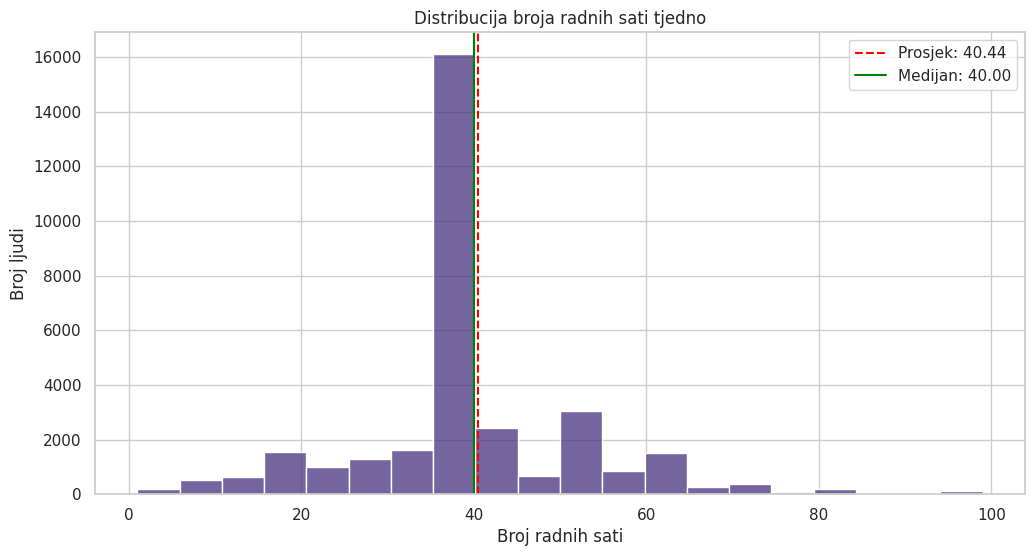

   Komentar: Distribucija ima izražen vrh oko 40 radnih sati tjedno, što je očekivano za standardno radno vrijeme. Postoje i manji vrhovi za skraćeno i produženo radno vrijeme.


In [ ]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA CILJNE VARIJABLE
# ==============================================================================
print("\n2. Deskriptivna analiza ciljne varijable (hours-per-week):")
plt.figure(figsize=(12, 6))
sns.histplot(y_adult_reg, kde=False, bins=20)
plt.title('Distribucija broja radnih sati tjedno')
plt.xlabel('Broj radnih sati')
plt.ylabel('Broj ljudi')
plt.axvline(y_adult_reg.mean(), color='r', linestyle='--', label=f'Prosjek: {y_adult_reg.mean():.2f}')
plt.axvline(y_adult_reg.median(), color='g', linestyle='-', label=f'Medijan: {y_adult_reg.median():.2f}')
plt.legend()
plt.show()
print("   Komentar: Distribucija ima izražen vrh oko 40 radnih sati tjedno, što je očekivano za standardno radno vrijeme. Postoje i manji vrhovi za skraćeno i produženo radno vrijeme.")



Modeliranje i evaluacija

In [ ]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Unakrsna Validacija)
# ==============================================================================
print("\n3. Modeliranje (Unakrsna Validacija, k=5 zbog veličine skupa):")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring_reg = {'neg_root_mean_squared_error': 'neg_root_mean_squared_error', 'r2': 'r2'}

regressors = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=2),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=2)
}

results_cv_adult_reg = {}
for name, reg in regressors.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_adult_reg),
                                     ('regressor', reg)])
    print(f"   Treniram model: {name}...")
    start_time = time.time()
    cv_scores = cross_validate(model_pipeline, X_adult_reg, y_adult_reg, cv=kf, scoring=scoring_reg, n_jobs=-1)
    end_time = time.time()

    results_cv_adult_reg[name] = {
        'RMSE (CV)': -cv_scores['test_neg_root_mean_squared_error'].mean(),
        'R2 Score (CV)': cv_scores['test_r2'].mean(),
        'Vrijeme (s)': end_time - start_time
    }

df_results_cv_adult_reg = pd.DataFrame.from_dict(results_cv_adult_reg, orient='index')


3. Modeliranje (Unakrsna Validacija, k=5 zbog veličine skupa):
   Treniram model: Decision Tree Regressor...
   Treniram model: Random Forest Regressor...
   Treniram model: XGBoost Regressor...


Usporedba performansi


4. Usporedba performansi:

Tablica rezultata (5-struka unakrsna validacija):


,RMSE (CV),R2 Score (CV),Vrijeme (s)
XGBoost Regressor,10.709,0.247,4.271
Random Forest Regressor,11.441,0.141,603.855
Decision Tree Regressor,14.359,-0.354,12.300


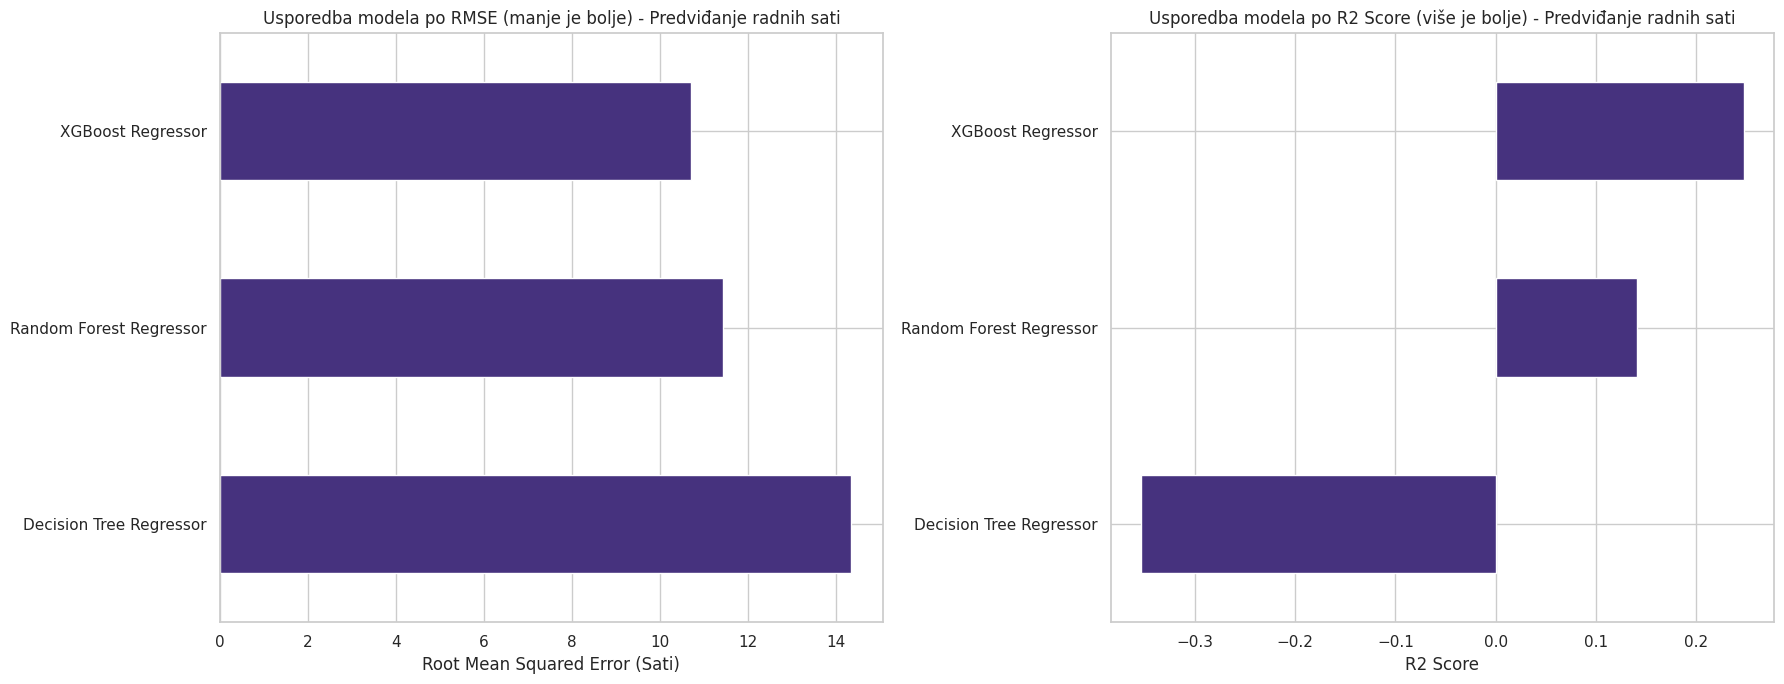


--- ANALIZA ZAVRŠENA: ADULT (REGRESIJA) ---


In [ ]:
# ==============================================================================
# 4. USPOREDBA PERFORMANSI
# ==============================================================================
print("\n4. Usporedba performansi:")
print("\nTablica rezultata (5-struka unakrsna validacija):")
display(df_results_cv_adult_reg.sort_values(by='RMSE (CV)', ascending=True))

# Vizualizacija
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
df_results_cv_adult_reg.sort_values(by='RMSE (CV)', ascending=False, inplace=True)
df_results_cv_adult_reg['RMSE (CV)'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Usporedba modela po RMSE (manje je bolje) - Predviđanje radnih sati')
axes[0].set_xlabel('Root Mean Squared Error (Sati)')

df_results_cv_adult_reg.sort_values(by='R2 Score (CV)', ascending=True, inplace=True)
df_results_cv_adult_reg['R2 Score (CV)'].plot(kind='barh', ax=axes[1])
axes[1].set_title('Usporedba modela po R2 Score (više je bolje) - Predviđanje radnih sati')
axes[1].set_xlabel('R2 Score')

plt.tight_layout()
plt.show()

print("\n--- ANALIZA ZAVRŠENA: ADULT (REGRESIJA) ---")


# <a id="wine"></a> 4. Analiza skupa podataka: Wine Quality

## 4.1 Regresija

In [ ]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
X_wine_reg = df_wine.drop('quality', axis=1)
y_wine_reg = df_wine['quality']

numeric_features_reg = X_wine_reg.select_dtypes(include=np.number).columns.tolist()
categorical_features_reg = ['type']

preprocessor_wine_reg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_reg),
        ('cat', OneHotEncoder(drop='first'), categorical_features_reg)
    ])
print("\n1. Cjevovod za pripremu podataka je kreiran.")





1. Cjevovod za pripremu podataka je kreiran.


Deskriptivna statistika


2. Deskriptivna analiza:


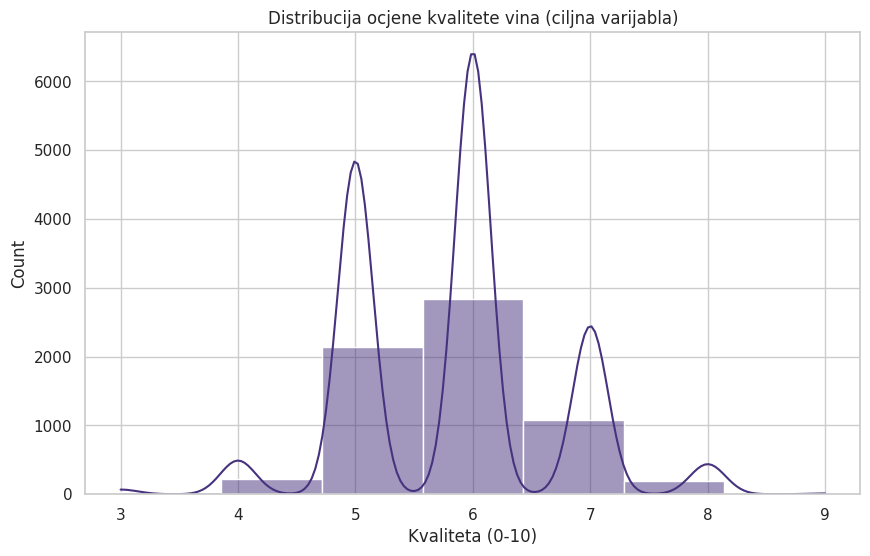

   Komentar: Distribucija je otprilike normalna, s vrhom oko ocjena 5 i 6.


In [ ]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA
# ==============================================================================
print("\n2. Deskriptivna analiza:")
plt.figure(figsize=(10, 6))
sns.histplot(y_wine_reg, bins=len(y_wine_reg.unique()), kde=True)
plt.title('Distribucija ocjene kvalitete vina (ciljna varijabla)')
plt.xlabel('Kvaliteta (0-10)')
plt.show()
print("   Komentar: Distribucija je otprilike normalna, s vrhom oko ocjena 5 i 6.")


Modeliranje i evaluacija

In [ ]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Unakrsna Validacija)
# ==============================================================================
print("\n3. Modeliranje (Unakrsna Validacija, k=10):")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_reg = {'neg_root_mean_squared_error': 'neg_root_mean_squared_error', 'r2': 'r2'}

# Napomena: ID3/C4.5 su samo za klasifikaciju, stoga ih ovdje ne koristimo.
regressors = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
}

results_cv_wine_reg = {}
for name, reg in regressors.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_wine_reg),
                                     ('regressor', reg)])
    print(f"   Treniram model: {name}...")
    start_time = time.time()
    cv_scores = cross_validate(model_pipeline, X_wine_reg, y_wine_reg, cv=kf, scoring=scoring_reg, n_jobs=-1)
    end_time = time.time()

    results_cv_wine_reg[name] = {
        'RMSE (CV)': -cv_scores['test_neg_root_mean_squared_error'].mean(), # Vraćamo u pozitivnu vrijednost
        'R2 Score (CV)': cv_scores['test_r2'].mean(),
        'Vrijeme (s)': end_time - start_time
    }

df_results_cv_wine_reg = pd.DataFrame.from_dict(results_cv_wine_reg, orient='index')


3. Modeliranje (Unakrsna Validacija, k=10):
   Treniram model: Decision Tree Regressor...
   Treniram model: Random Forest Regressor...
   Treniram model: XGBoost Regressor...


Usporedba performansi


4. Usporedba performansi:

Tablica rezultata (10-struka unakrsna validacija):


,RMSE (CV),R2 Score (CV),Vrijeme (s)
Random Forest Regressor,0.596,0.534,36.524
XGBoost Regressor,0.628,0.481,2.046
Decision Tree Regressor,0.812,0.129,0.601


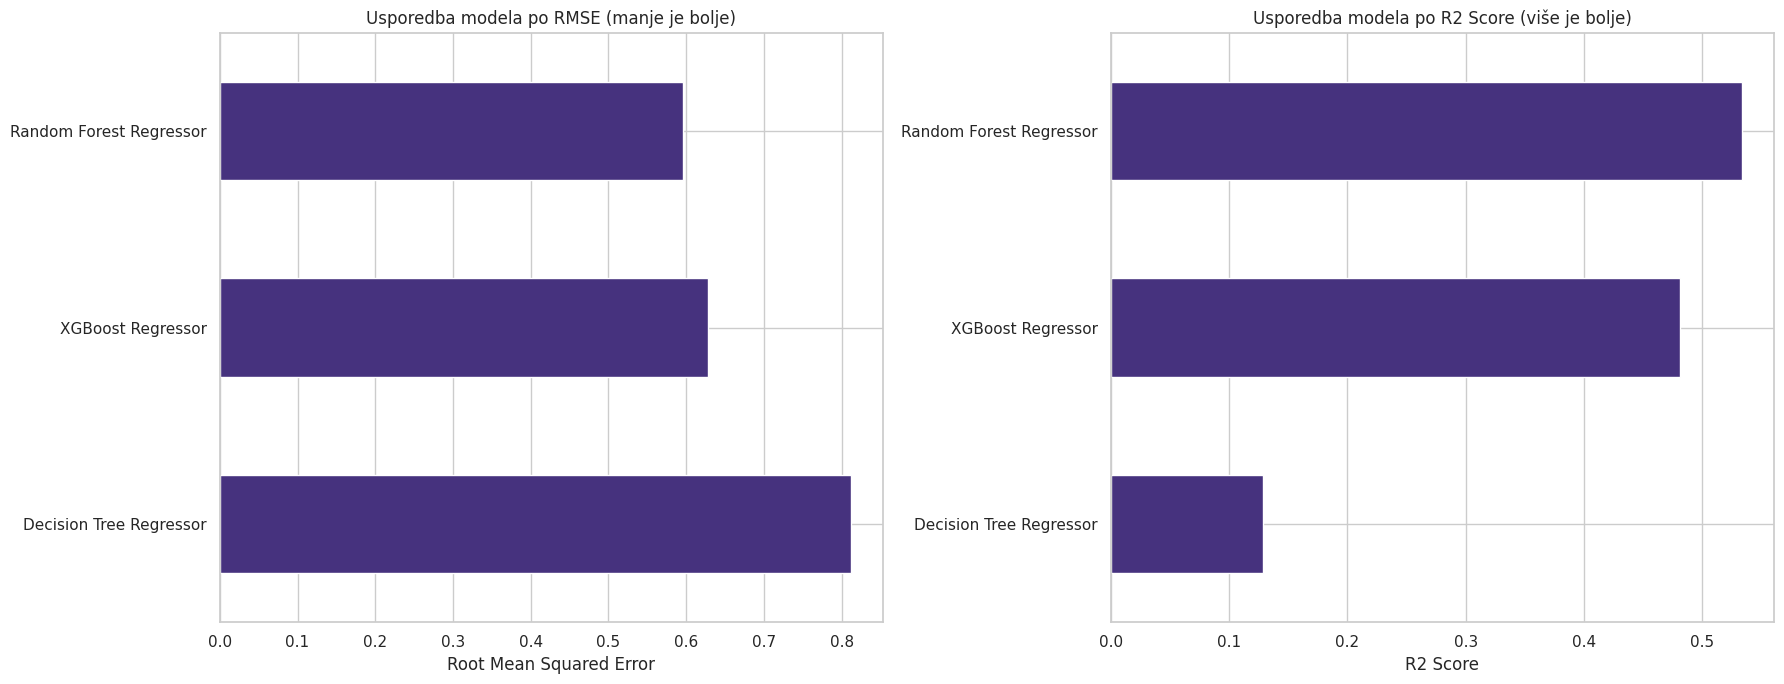


--- ANALIZA ZAVRŠENA: WINE QUALITY (REGRESIJA) ---


In [ ]:
# ==============================================================================
# 4. USPOREDBA PERFORMANSI
# ==============================================================================
print("\n4. Usporedba performansi:")
print("\nTablica rezultata (10-struka unakrsna validacija):")
display(df_results_cv_wine_reg.sort_values(by='RMSE (CV)', ascending=True))

# Vizualizacija
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
df_results_cv_wine_reg.sort_values(by='RMSE (CV)', ascending=False, inplace=True)
df_results_cv_wine_reg['RMSE (CV)'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Usporedba modela po RMSE (manje je bolje)')
axes[0].set_xlabel('Root Mean Squared Error')

df_results_cv_wine_reg.sort_values(by='R2 Score (CV)', ascending=True, inplace=True)
df_results_cv_wine_reg['R2 Score (CV)'].plot(kind='barh', ax=axes[1])
axes[1].set_title('Usporedba modela po R2 Score (više je bolje)')
axes[1].set_xlabel('R2 Score')

plt.tight_layout()
plt.show()

print("\n--- ANALIZA ZAVRŠENA: WINE QUALITY (REGRESIJA) ---")


## 4.2 Klasifikacija

In [ ]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
# Stvaranje nove kategoričke ciljne varijable
df_wine_class = df_wine.copy()
df_wine_class['quality_label'] = pd.cut(df_wine_class['quality'],
                                        bins=[0, 4, 6, 10],
                                        labels=['low', 'medium', 'high'])

X_wine_class = df_wine_class.drop(['quality', 'quality_label'], axis=1)
y_wine_class_raw = df_wine_class['quality_label']

le_wine = LabelEncoder()
y_wine_class = le_wine.fit_transform(y_wine_class_raw)

numeric_features_class = X_wine_class.select_dtypes(include=np.number).columns.tolist()
categorical_features_class = ['type']

preprocessor_wine_class = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_class),
        ('cat', OneHotEncoder(drop='first'), categorical_features_class)
    ])
print("\n1. Cjevovod za pripremu podataka je kreiran.")




1. Cjevovod za pripremu podataka je kreiran.


Deskriptivna statistika


2. Deskriptivna analiza:


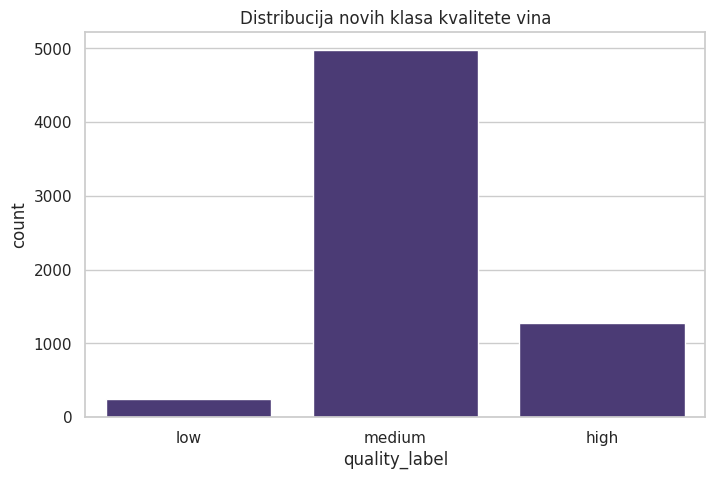

   Komentar: Nove klase su jako neuravnotežene, s dominacijom 'medium' klase.


In [ ]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA
# ==============================================================================
print("\n2. Deskriptivna analiza:")
plt.figure(figsize=(8, 5))
sns.countplot(x=y_wine_class_raw, order=['low', 'medium', 'high'])
plt.title('Distribucija novih klasa kvalitete vina')
plt.show()
print("   Komentar: Nove klase su jako neuravnotežene, s dominacijom 'medium' klase.")

Modeliranje i evaluacija

In [ ]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Unakrsna Validacija)
# ==============================================================================
print("\n3. Modeliranje (Unakrsna Validacija, k=10):")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_metrics = {'f1_weighted': 'f1_weighted', 'accuracy': 'accuracy'}

classifiers = {
    "ID3/C4.5 (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "CART (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42, n_jobs=-1)
}

results_cv_wine_class = {}
for name, clf in classifiers.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_wine_class),
                                     ('classifier', clf)])
    print(f"   Treniram model: {name}...")
    cv_scores = cross_validate(model_pipeline, X_wine_class, y_wine_class, cv=kf, scoring=scoring_metrics, n_jobs=-1)

    results_cv_wine_class[name] = {
        'F1-Score (CV)': cv_scores['test_f1_weighted'].mean(),
        'Točnost (CV)': cv_scores['test_accuracy'].mean()
    }

df_results_cv_wine_class = pd.DataFrame.from_dict(results_cv_wine_class, orient='index')




3. Modeliranje (Unakrsna Validacija, k=10):
   Treniram model: ID3/C4.5 (Entropy)...
   Treniram model: CART (Gini)...
   Treniram model: Random Forest...
   Treniram model: XGBoost...


Usporedba performansi


4. Usporedba performansi:

Tablica rezultata (10-struka unakrsna validacija):


,F1-Score (CV),Točnost (CV)
Random Forest,0.845,0.861
XGBoost,0.839,0.852
ID3/C4.5 (Entropy),0.802,0.803
CART (Gini),0.797,0.797


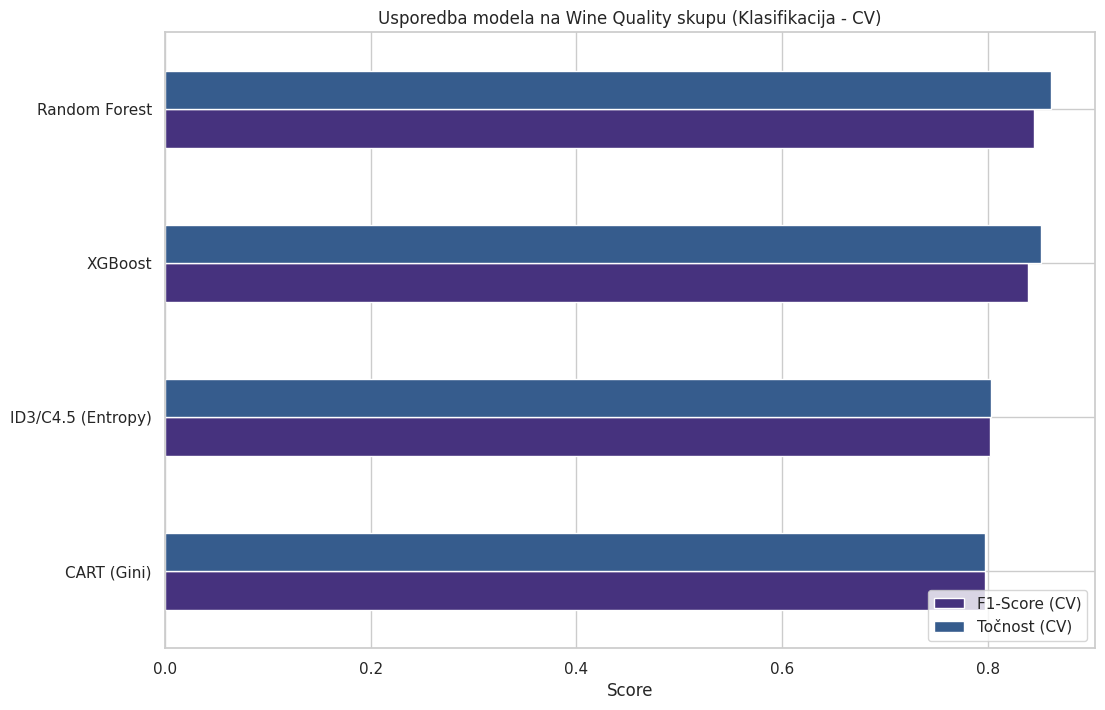


--- ANALIZA ZAVRŠENA: WINE QUALITY (KLASIFIKACIJA) ---


In [ ]:
# ==============================================================================
# 4. USPOREDBA PERFORMANSI
# ==============================================================================
print("\n4. Usporedba performansi:")
print("\nTablica rezultata (10-struka unakrsna validacija):")
display(df_results_cv_wine_class.sort_values(by='F1-Score (CV)', ascending=False))

# Vizualizacija
df_results_cv_wine_class.sort_values(by='F1-Score (CV)', ascending=True, inplace=True)
df_results_cv_wine_class.plot(kind='barh', figsize=(12, 8))
plt.title('Usporedba modela na Wine Quality skupu (Klasifikacija - CV)')
plt.xlabel('Score')
plt.legend(loc='lower right')
plt.show()

print("\n--- ANALIZA ZAVRŠENA: WINE QUALITY (KLASIFIKACIJA) ---")


# <a id="cancer"></a> 5. Analiza skupa podataka: Breast Cancer Wisconsin

In [ ]:
# ==============================================================================
# 1. PRIPREMA PODATAKA
# ==============================================================================
# Uklanjanje beskorisnog 'id' stupca
X_cancer = df_cancer.drop(['id', 'diagnosis'], axis=1)
y_cancer_raw = df_cancer['diagnosis']

# Kodiranje ciljne varijable
le_cancer = LabelEncoder()
y_cancer = le_cancer.fit_transform(y_cancer_raw)

# Svi stupci su numerički, stoga je priprema jednostavnija
# Potrebno je samo skaliranje
preprocessor_cancer = StandardScaler()
print("\n1. Priprema podataka definirana (Standardno skaliranje).")




1. Priprema podataka definirana (Standardno skaliranje).


Deskriptivna statistika


2. Deskriptivna analiza:


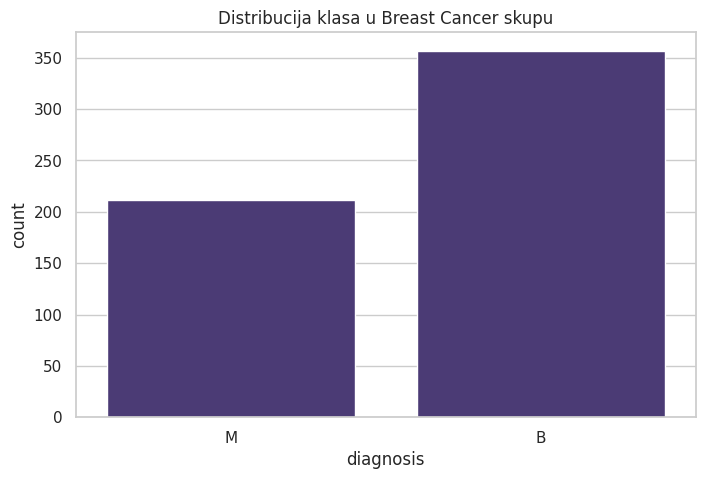

   Komentar: Klase su relativno dobro balansirane.


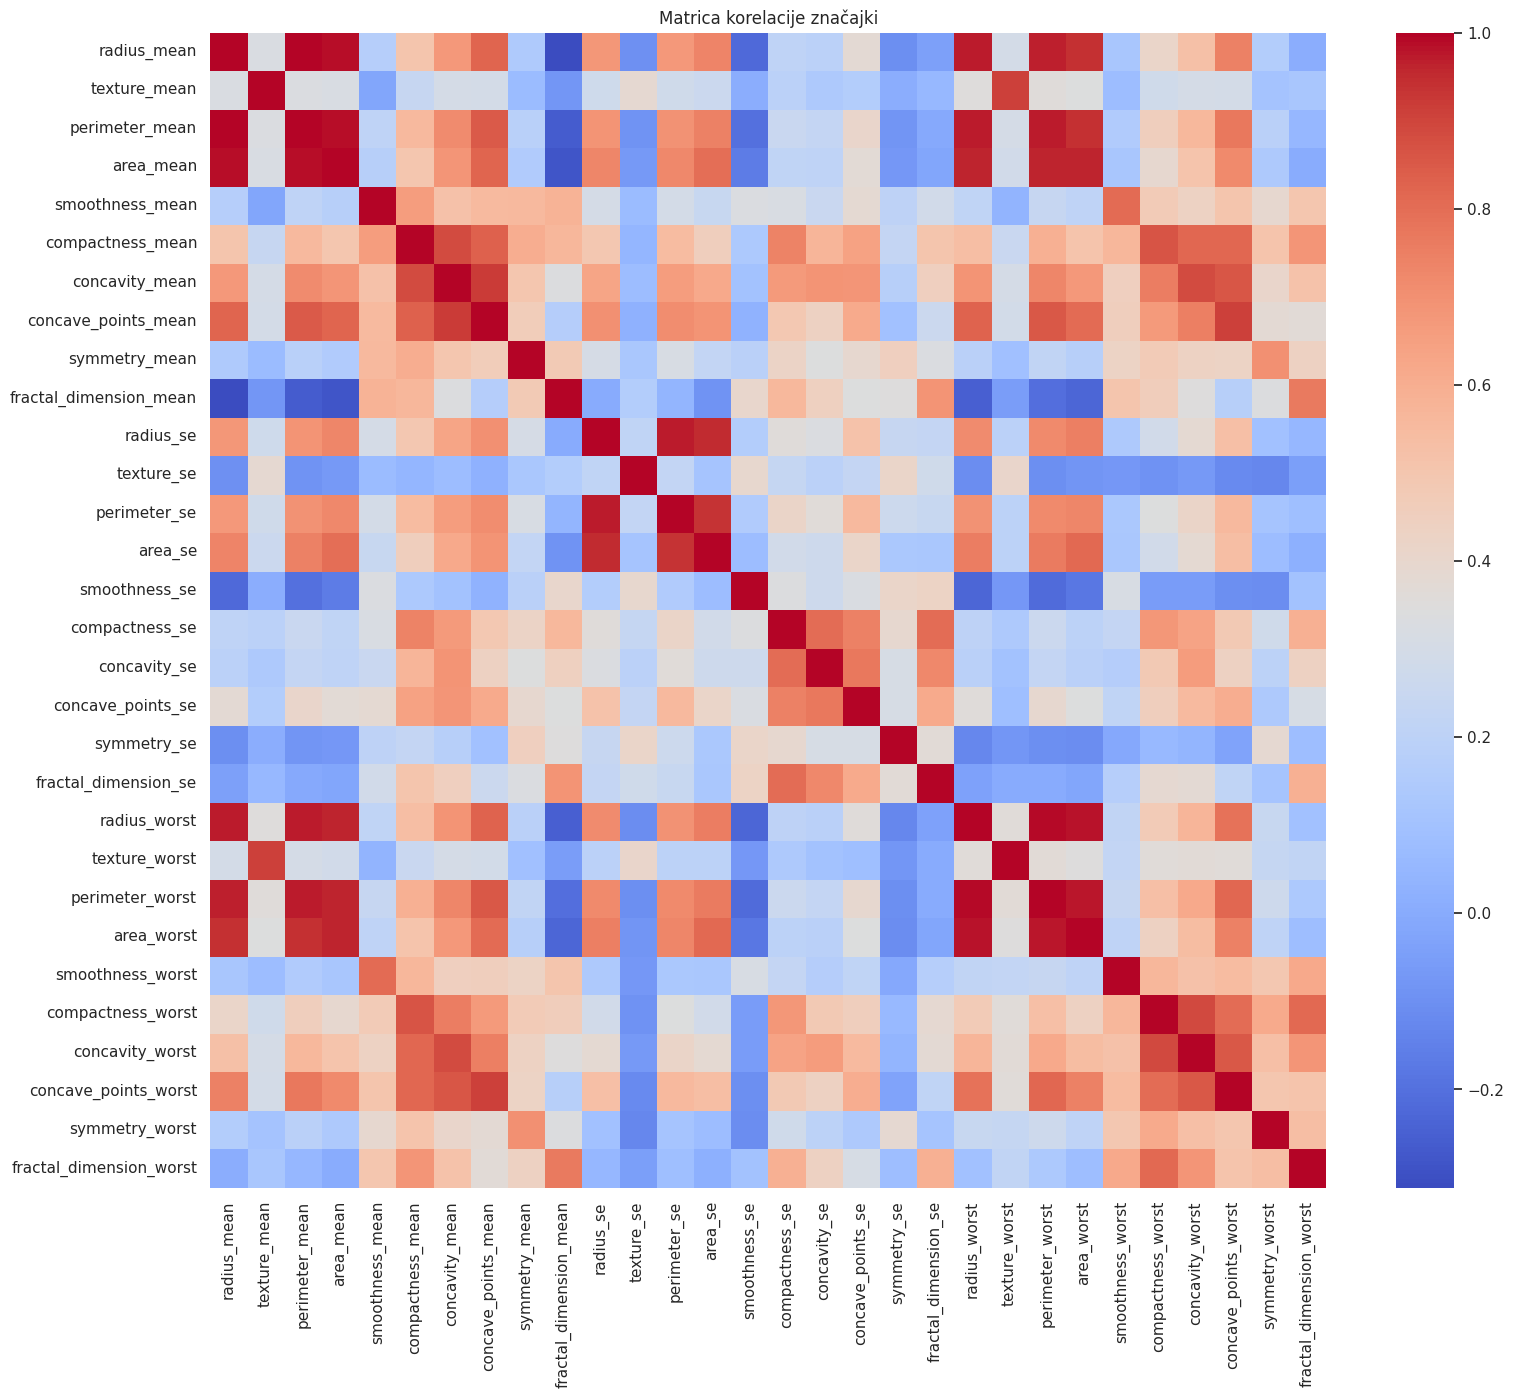

   Komentar: Primjetna je visoka korelacija između grupa značajki (npr. 'mean' varijable).
   Stabla odlučivanja i njihovi ansambli su generalno robusni na ovaj problem (multikolinearnost).


In [ ]:
# ==============================================================================
# 2. DESKRIPTIVNA STATISTIKA I VIZUALIZACIJA
# ==============================================================================
print("\n2. Deskriptivna analiza:")
plt.figure(figsize=(8, 5))
sns.countplot(x=y_cancer_raw)
plt.title('Distribucija klasa u Breast Cancer skupu')
plt.show()
print("   Komentar: Klase su relativno dobro balansirane.")

# Matrica korelacije
plt.figure(figsize=(18, 15))
correlation_matrix = X_cancer.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matrica korelacije značajki')
plt.show()
print("   Komentar: Primjetna je visoka korelacija između grupa značajki (npr. 'mean' varijable).")
print("   Stabla odlučivanja i njihovi ansambli su generalno robusni na ovaj problem (multikolinearnost).")

Modeliranje i evaluacija

In [ ]:
# ==============================================================================
# 3. MODELIRANJE I EVALUACIJA (Unakrsna Validacija)
# ==============================================================================
print("\n3. Modeliranje (Unakrsna Validacija, k=10):")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_metrics = {'accuracy': 'accuracy', 'f1_weighted': 'f1_weighted', 'roc_auc': 'roc_auc'}

classifiers = {
    "ID3/C4.5 (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "CART (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)
}

results_cv_cancer = {}
for name, clf in classifiers.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_cancer),
                                     ('classifier', clf)])
    print(f"   Treniram model: {name}...")
    cv_scores = cross_validate(model_pipeline, X_cancer, y_cancer, cv=kf, scoring=scoring_metrics, n_jobs=-1)

    results_cv_cancer[name] = {
        'Točnost (CV)': cv_scores['test_accuracy'].mean(),
        'F1-Score (CV)': cv_scores['test_f1_weighted'].mean(),
        'ROC AUC (CV)': cv_scores['test_roc_auc'].mean(),
    }

df_results_cv_cancer = pd.DataFrame.from_dict(results_cv_cancer, orient='index')


3. Modeliranje (Unakrsna Validacija, k=10):
   Treniram model: ID3/C4.5 (Entropy)...
   Treniram model: CART (Gini)...
   Treniram model: Random Forest...
   Treniram model: XGBoost...


Usporedba modela


4. Usporedba performansi:

Tablica rezultata (10-struka unakrsna validacija):


,Točnost (CV),F1-Score (CV),ROC AUC (CV)
Random Forest,0.963,0.963,0.993
XGBoost,0.968,0.968,0.992
ID3/C4.5 (Entropy),0.942,0.942,0.938
CART (Gini),0.935,0.935,0.928


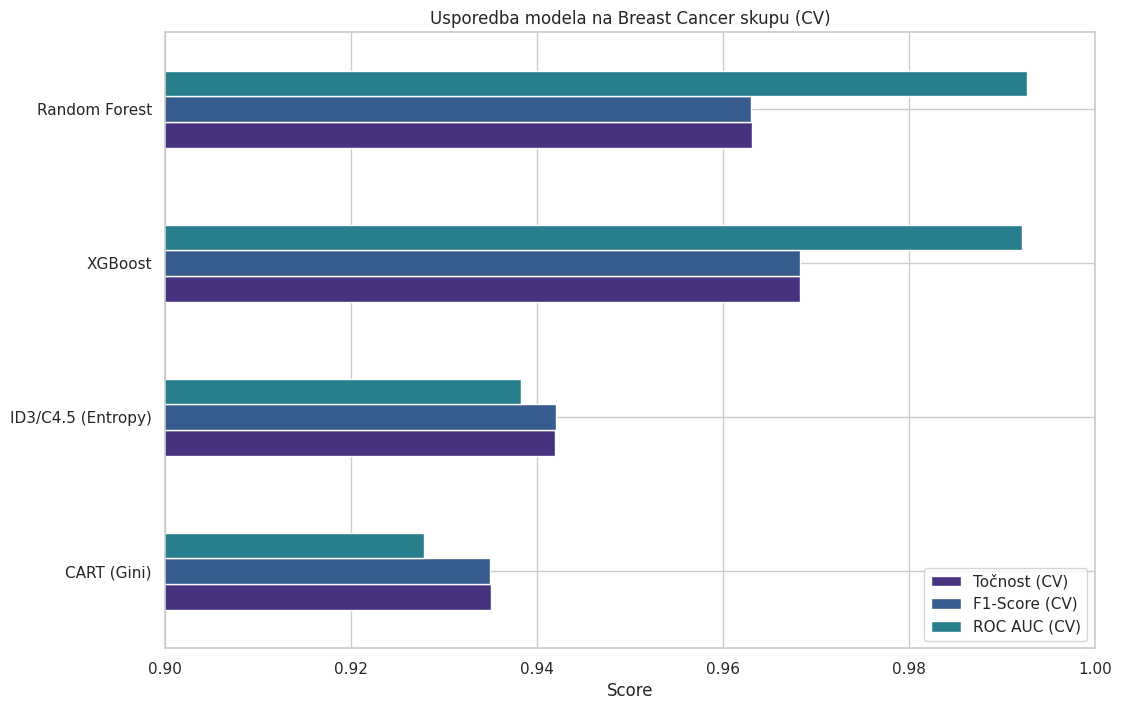


--- ANALIZA ZAVRŠENA: BREAST CANCER SKUP PODATAKA ---


In [ ]:
# ==============================================================================
# 4. USPOREDBA PERFORMANSI
# ==============================================================================
print("\n4. Usporedba performansi:")
print("\nTablica rezultata (10-struka unakrsna validacija):")
display(df_results_cv_cancer.sort_values(by='ROC AUC (CV)', ascending=False))

# Vizualizacija
df_results_cv_cancer.sort_values(by='ROC AUC (CV)', ascending=True, inplace=True)
df_results_cv_cancer.plot(kind='barh', figsize=(12, 8))
plt.title('Usporedba modela na Breast Cancer skupu (CV)')
plt.xlabel('Score')
plt.xlim(0.9, 1.0)
plt.legend(loc='lower right')
plt.show()

print("\n--- ANALIZA ZAVRŠENA: BREAST CANCER SKUP PODATAKA ---")


## Statističko testiranje značajnosti RF i XGBoost modela


Hipoteze:

Nulta Hipoteza (H
0
​
 ): Ne postoji statistički značajna razlika u performansama (mjerenim ROC AUC metrikom) između Random Forest i XGBoost modela na Adult skupu podataka. Prosječna razlika u performansama između modela je nula.

Alternativna Hipoteza (H
1
​
 ): Postoji statistički značajna razlika u performansama između Random Forest i XGBoost modela na Adult skupu podataka. Prosječna razlika u performansama je različita od nule.

Koristit ćemo upareni Studentov t-test jer uspoređujemo dva modela na istim podjelama podataka (istim foldovima unakrsne validacije). Prag značajnosti (alfa) postavit ćemo na standardnih 0.05. Ako je dobivena p-vrijednost manja od 0.05, odbacujemo nultu hipotezu.

In [45]:
# Pretpostavka: Sljedeći objekti već postoje u memoriji iz analize Adult skupa:
# - preprocessor_adult: Cjevovod za predobradu
# - X_adult: Cijeli skup značajki
# - y_adult: Cijeli skup kodiranih ciljnih varijabli

from scipy import stats

print("--- ZAPOČINJEM STATISTIČKO TESTIRANJE ZNAČAJNOSTI ---")

# 1. KORAK: Priprema modela i unakrsne validacije
# Definiramo dva modela koja želimo usporediti
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)

# Stvaramo potpune cjevovode za svaki model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_adult), ('classifier', rf_model)])
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_adult), ('classifier', xgb_model)])

# Definiramo shemu unakrsne validacije
kf = KFold(n_splits=10, shuffle=True, random_state=42)
print("\n1. Modeli i 10-struka unakrsna validacija su definirani.")

# 2. KORAK: Izvođenje unakrsne validacije i spremanje rezultata za svaki fold
print("\n2. Izvodim unakrsnu validaciju za oba modela kako bih dobio listu performansi...")

# Metrika koju želimo testirati
metric_to_test = 'roc_auc'

# Izračun performansi za Random Forest
rf_scores = cross_val_score(rf_pipeline, X_adult, y_adult, cv=kf, scoring=metric_to_test, n_jobs=-1)
print(f"   - Random Forest - Prosječni {metric_to_test.upper()}: {rf_scores.mean():.4f} (Std: {rf_scores.std():.4f})")

# Izračun performansi za XGBoost
xgb_scores = cross_val_score(xgb_pipeline, X_adult, y_adult, cv=kf, scoring=metric_to_test, n_jobs=-1)
print(f"   - XGBoost - Prosječni {metric_to_test.upper()}: {xgb_scores.mean():.4f} (Std: {xgb_scores.std():.4f})")


# 3. KORAK: Provedba uparenog t-testa
print("\n3. Provodim upareni Studentov t-test na dobivenim rezultatima...")
# Koristimo ttest_rel jer su uzorci upareni (isti foldovi za oba modela)
t_statistic, p_value = stats.ttest_rel(rf_scores, xgb_scores)

print(f"   - T-statistika: {t_statistic:.4f}")
print(f"   - P-vrijednost: {p_value:.4f}")

# 4. KORAK: Interpretacija rezultata
print("\n4. Interpretacija p-vrijednosti:")
alpha = 0.05  # Prag značajnosti

if p_value < alpha:
    print(f"   P-vrijednost ({p_value:.4f}) je manja od alpha ({alpha}).")
    print("   ✅ ODBACUJEMO nultu hipotezu.")
    print("   Zaključak: Postoji statistički značajna razlika u performansama između Random Forest i XGBoost modela.")

    # Dodatna provjera koji model je bolji
    if xgb_scores.mean() > rf_scores.mean():
        print("   XGBoost model je statistički značajno bolji.")
    else:
        print("   Random Forest model je statistički značajno bolji.")

else:
    print(f"   P-vrijednost ({p_value:.4f}) je veća od alpha ({alpha}).")
    print("   ❌ NE ODBACUJEMO nultu hipotezu.")
    print("   Zaključak: Ne postoji statistički značajna razlika u performansama između ova dva modela na ovom skupu podataka.")


print("\n--- STATISTIČKO TESTIRANJE JE GOTOVO ---")


--- ZAPOČINJEM STATISTIČKO TESTIRANJE ZNAČAJNOSTI ---

1. Modeli i 10-struka unakrsna validacija su definirani.

2. Izvodim unakrsnu validaciju za oba modela kako bih dobio listu performansi...
   - Random Forest - Prosječni ROC_AUC: 0.8922 (Std: 0.0060)
   - XGBoost - Prosječni ROC_AUC: 0.9285 (Std: 0.0056)

3. Provodim upareni Studentov t-test na dobivenim rezultatima...
   - T-statistika: -36.8255
   - P-vrijednost: 0.0000

4. Interpretacija p-vrijednosti:
   P-vrijednost (0.0000) je manja od alpha (0.05).
   ✅ ODBACUJEMO nultu hipotezu.
   Zaključak: Postoji statistički značajna razlika u performansama između Random Forest i XGBoost modela.
   XGBoost model je statistički značajno bolji.

--- STATISTIČKO TESTIRANJE JE GOTOVO ---


## Završna usporedba svih modela

--- ZAPOČINJEM AUTOMATSKO PRIKUPLJANJE REZULTATA ---

--- REZULTATI USPJEŠNO PRIKUPLJENI ---

Tablični prikaz sažetih rezultata:


,ID3/C4.5 (Entropy),CART (Gini),Random Forest,XGBoost,Decision Tree Regressor,Random Forest Regressor,XGBoost Regressor
Iris (ROC AUC),0.938,0.928,0.993,0.992,-,-,-
Bank Marketing (ROC AUC),0.620,0.614,0.781,0.776,-,-,-
Adult (ROC AUC),0.769,0.769,0.892,0.928,-,-,-
"Wine Quality (Classification, F1-Score)",0.802,0.797,0.845,0.839,-,-,-
Breast Cancer (ROC AUC),0.938,0.928,0.993,0.992,-,-,-
"Wine Quality (Regression, -RMSE)",-,-,-,-,-0.812,-0.596,-0.628
"Bank Marketing (Regression, -RMSE)",-,-,-,-,-10.977,-7.992,-7.765
"Adult (Regression, -RMSE)",-,-,-,-,-14.359,-11.441,-10.709



Vizualni prikaz performansi (Heatmap):


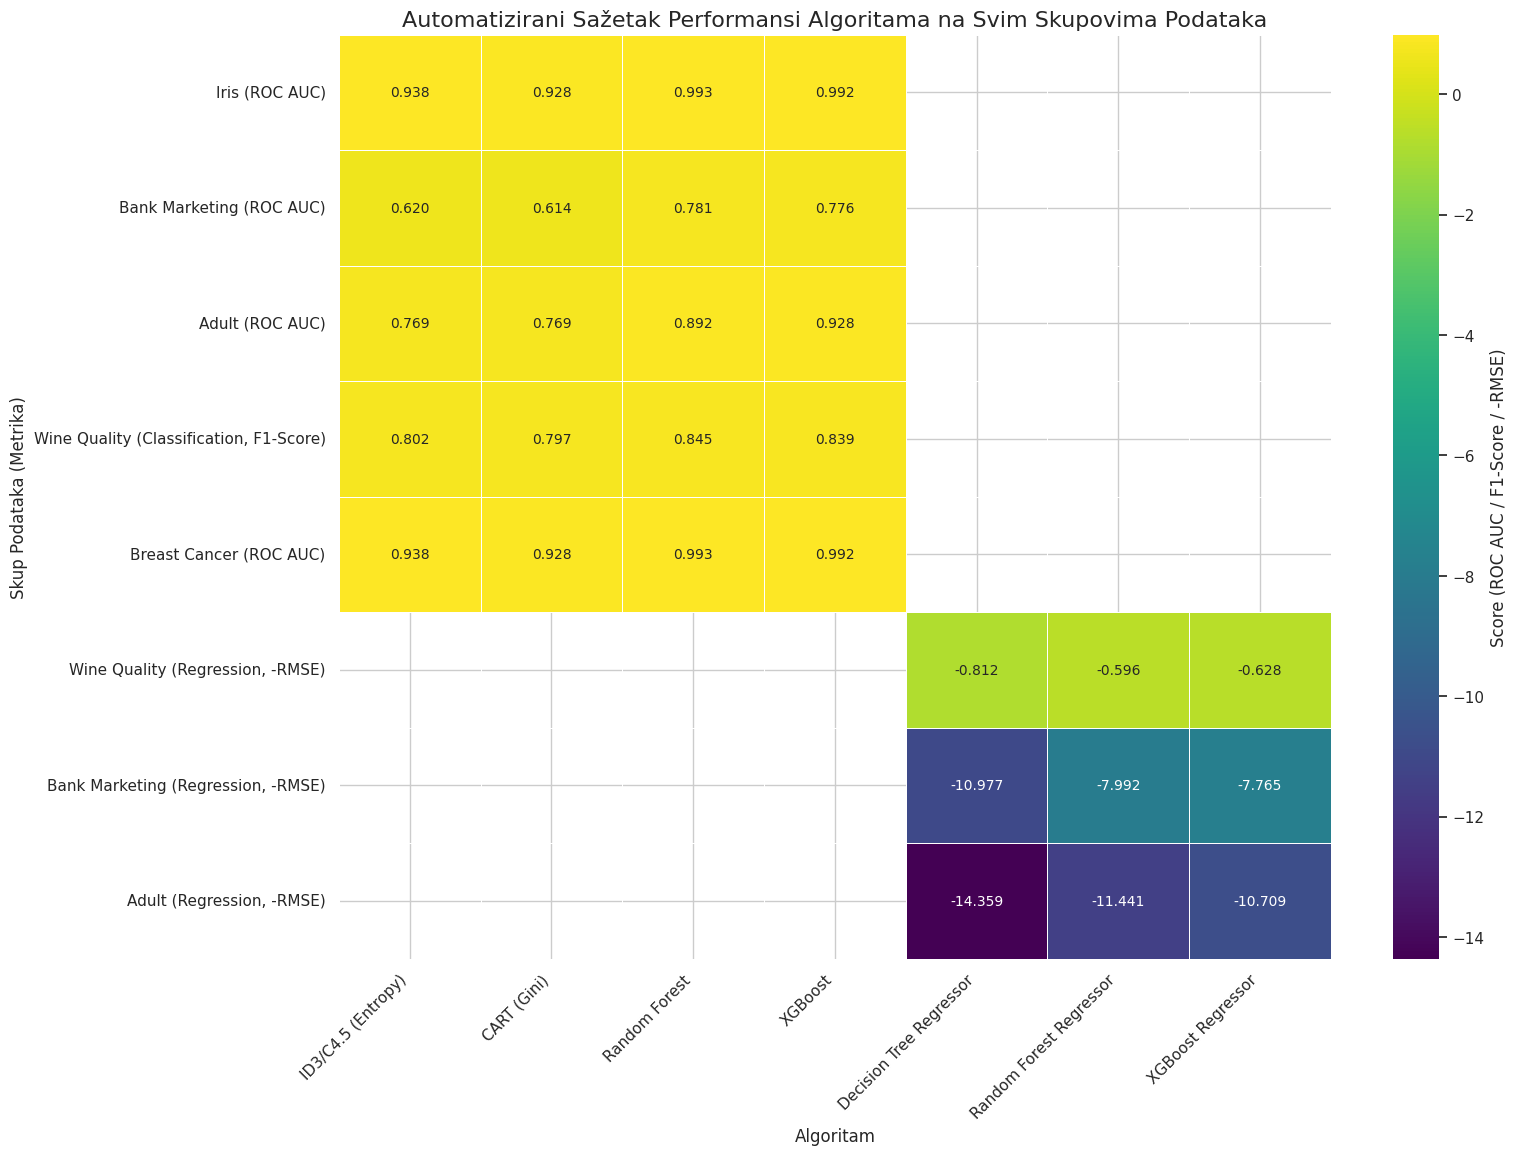


--- ZAVRŠNA USPOREDBA JE GOTOVA ---


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
#        AUTOMATIZIRANA ZAVRŠNA SINTEZA I USPOREDBA PERFORMANSI
# ==============================================================================
print("--- ZAPOČINJEM AUTOMATSKO PRIKUPLJANJE REZULTATA ---")

# 1. KORAK: Inicijalizacija rječnika za prikupljanje svih rezultata
# Ovaj rječnik će držati sve DataFrameove s rezultatima iz prethodnih analiza.
all_results_dfs = {
    'Iris (ROC AUC)': 'df_results_cv_cancer', # Koristimo ROC AUC za balansirani skup
    'Bank Marketing (ROC AUC)': 'df_results_cv_bank',
    'Adult (ROC AUC)': 'df_results_cv_adult',
    'Wine Quality (Classification, F1-Score)': 'df_results_cv_wine_class',
    'Breast Cancer (ROC AUC)': 'df_results_cv_cancer',
    'Wine Quality (Regression, -RMSE)': 'df_results_cv_wine_reg',
    'Bank Marketing (Regression, -RMSE)': 'df_results_cv_bank_reg',
    'Adult (Regression, -RMSE)': 'df_results_cv_adult_reg'
}

# Definicija ključnih metrika za svaki tip problema
classification_metric = 'ROC AUC (CV)'
classification_metric_wine = 'F1-Score (CV)' # Specifično za Wine Quality klasifikaciju
regression_metric = 'RMSE (CV)'

# Rječnik za spremanje konačnih, čistih rezultata
final_summary_data = {}

# 2. KORAK: Automatsko prolazak kroz sve analize i izvlačenje rezultata
for display_name, df_name in all_results_dfs.items():
    if df_name in locals():
        # Dohvaćamo DataFrame iz memorije bilježnice
        results_df = locals()[df_name]

        # Inicijaliziramo red za našu finalnu tablicu
        row_data = {}

        # Provjeravamo radi li se o klasifikaciji ili regresiji
        if 'Regression' in display_name:
            # Regresija: Izvlačimo RMSE i množimo s -1 za heatmap
            for model_name in results_df.index:
                metric_value = results_df.loc[model_name, regression_metric]
                row_data[model_name] = -metric_value # Negativna vrijednost za heatmap
        else:
            # Klasifikacija
            metric_to_use = classification_metric_wine if 'Wine' in display_name else classification_metric
            for model_name in results_df.index:
                if metric_to_use in results_df.columns:
                    row_data[model_name] = results_df.loc[model_name, metric_to_use]

        final_summary_data[display_name] = row_data
    else:
        print(f"UPOZORENJE: DataFrame '{df_name}' nije pronađen. Ta analiza neće biti uključena u sažetak.")

# 3. KORAK: Kreiranje finalnog DataFrame-a iz prikupljenih podataka
df_final_summary = pd.DataFrame.from_dict(final_summary_data, orient='index')

# Spajanje klasifikacijskih i regresijskih algoritama u jednu tablicu
# Kreiramo stupce za sve moguće modele
all_classifiers = [
    "ID3/C4.5 (Entropy)", "CART (Gini)", "Random Forest", "XGBoost"
]
all_regressors = [
    "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"
]

# Spajamo sve stupce i popunjavamo s NaN gdje je potrebno
df_final_summary = df_final_summary.reindex(columns=all_classifiers + all_regressors)

print("\n--- REZULTATI USPJEŠNO PRIKUPLJENI ---")

# 4. KORAK: Prikaz tablice i vizualizacije
print("\nTablični prikaz sažetih rezultata:")
display(df_final_summary.style.format("{:.3f}", na_rep="-").background_gradient(cmap='viridis', axis=1))

print("\nVizualni prikaz performansi (Heatmap):")
plt.figure(figsize=(16, 12))
sns.heatmap(df_final_summary.astype(float),
            annot=True,
            fmt=".3f",
            linewidths=.5,
            cmap="viridis",
            cbar_kws={'label': 'Score (ROC AUC / F1-Score / -RMSE)'},
            annot_kws={"size": 10})
plt.title('Automatizirani Sažetak Performansi Algoritama na Svim Skupovima Podataka', fontsize=16)
plt.ylabel('Skup Podataka (Metrika)', fontsize=12)
plt.xlabel('Algoritam', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

print("\n--- ZAVRŠNA USPOREDBA JE GOTOVA ---")
